## 통계

In [35]:
#==========================
# 작성자: 한소희
# 작성일자: 2025-12-23
# 내용: success_master정리 후 재통계
#==========================

In [36]:
# Import Libraries
#초기 설정및 시스템 라이브러리
import platform
import warnings

# 데이터 시각화 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
print(platform.system())
warnings.filterwarnings('ignore')

# 행,열,결과값 생략 없이 보기,세팅
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

# 시각화 OS별 한글폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 폰트 설정
elif platform.system() == 'Mac':
    plt.rcParams['font.family'] = 'AppleGothic'  # Mac 폰트 설정
    
print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

Windows
라이브러리 로드 완료!
한글 폰트 설정 완료!


In [37]:
# Load Dataset
s_master   = pd.read_csv("./data/stat/success_master.csv")         # success_master
s_profile  = pd.read_csv("./data/stat/startup_profile.csv")        # startup_profile
print("="*60)
print("데이터셋 로드 완료!")
print("="*60)

데이터셋 로드 완료!


In [38]:
print("s_master: ", s_master.shape)
print("s_profile: ", s_profile.shape)

s_master:  (483539, 58)
s_profile:  (194151, 25)


In [39]:
print(s_master[["objects_cfpr_id","funding_round_id"]].duplicated().sum())
print(s_profile["objects_cfpr_id"].duplicated().sum())

0
0


In [40]:
# invested_c_id notna
# c
cond1 = s_master["objects_cfpr_id"].astype(str).str.startswith("c:")  
# cond2 = s_master["invested_c_id"].notna()
s_master = s_master[cond1].copy()   
s_master.shape

(217468, 58)

In [41]:
s_master.columns

Index(['objects_cfpr_id', 'founded_at', 'closed_at', 'description',
       'country_code', 'obj_city_fixed', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'invested_companies',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'relationships', 'cat_obj_status',
       'obj_category_filled', 'cat_obj_overview', 'obj_state_filled',
       'is_obj_funding_total_usd_private', 'success_flag', 'size_bin',
       'time_to_last_round_months', 'funding_round_id', 'fr_c_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'pre_money_valuation_usd', 'post_money_valuation_usd', 'participants',
       'is_first_round', 'is_last_round', 'funded_year', 'funded_quarter',
       'cat_fr_type', 'num_fr_type', 'log_participants',
       'is_fr_raised_private', 'prev_round_date', 'round_tempo_days',
       'round_tempo_months', 'acquired_c_id', 'acquisition_id',
       'acquiring_c_id', 'acquir

In [42]:
s_profile.columns

Index(['objects_cfpr_id', 'founded_at', 'closed_at', 'description',
       'country_code', 'obj_city_fixed', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'invested_companies',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'relationships', 'cat_obj_status',
       'obj_category_filled', 'cat_obj_overview', 'obj_state_filled',
       'is_obj_funding_total_usd_private', 'offices_c_id', 'office_id',
       'office_city', 'rel_cf_id', 'relationship_growth'],
      dtype='object')

s_profile

<span style = "font-size: 18px">
조인1: <b>s_profile_office</b><br>
</span>
<span style = "font-size: 13px">
* 1행 1스타트업(중복x)<br>
* office use col: success_flag, n_offices, participants<br>
</span>

In [43]:
s_master_by_compnay = (
    s_master
    .groupby("objects_cfpr_id")
    .agg(
        success_flag = ("success_flag", "max"),
        n_offices = ("n_offices", "first"),
        participants = ("participants", "first"),
    )
)
s_master_by_compnay.shape

(196549, 3)

In [44]:
# 1행 = 1스타트업 조인
# USE_COLS = [
#     'success_flag'          , 'size_bin'                , 'round_tempo_months'          , 'time_to_last_round_months'   , 
#     'funding_round_id'      , 'fr_c_id'                 , 'funded_at'                   , 'participants'                , 
#     'is_first_round'        , 'is_last_round'           , 'investments_id'              , 'invested_c_id'               , 
#     'investor_cfp_id'       , 'acquisition_id'          , 'acquiring_c_id'              , 'acquired_at'                 , 
#     'is_acq_price_private'  , 'price_amount_usd'        , 'ipo_id'                      , 'first_public_at'             , 
#     'valuation_amount_usd'  , 'ipo_raised_amount_usd'   , 'is_ipos_valuation_private'   , 'is_ipos_raised_private'      , 
#     'reinvest_flag'         , 'n_offices'
# ]
# USE_COLS = [
#     'success_flag', 'n_offices', 'participants'
# ]

s_profile_master = (
    # s_profile ← s_master_by_compnay
    s_profile
    .merge(
        s_master_by_compnay,
        on="objects_cfpr_id",
        how="left"
    )  
)
print(s_profile_master.columns)

Index(['objects_cfpr_id', 'founded_at', 'closed_at', 'description',
       'country_code', 'obj_city_fixed', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'invested_companies',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'relationships', 'cat_obj_status',
       'obj_category_filled', 'cat_obj_overview', 'obj_state_filled',
       'is_obj_funding_total_usd_private', 'offices_c_id', 'office_id',
       'office_city', 'rel_cf_id', 'relationship_growth', 'success_flag',
       'n_offices', 'participants'],
      dtype='object')


In [45]:
# grain check ✅
print(s_profile_master["objects_cfpr_id"].duplicated().sum())

0


<span style = "font-size: 18px">
조인1: <b>s_master_profile</b><br>
</span>
<span style = "font-size: 13px">
* 성공 정보<br>
* objects_cfpr_id 중복 허용 <br>
</span>

In [46]:
USE_COLS = [
    'offices_c_id'  , 'office_id'           , 'office_city', 
    'rel_cf_id'     , 'relationship_growth'
]
s_master_profile = (
    # s_master ← s_profile
    s_master 
    .merge(
        s_profile[USE_COLS + ["objects_cfpr_id"]],
        on="objects_cfpr_id",
        how="left"
    )  
)
print(s_master_profile.columns)
s_master_profile.shape

Index(['objects_cfpr_id', 'founded_at', 'closed_at', 'description',
       'country_code', 'obj_city_fixed', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'invested_companies',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'relationships', 'cat_obj_status',
       'obj_category_filled', 'cat_obj_overview', 'obj_state_filled',
       'is_obj_funding_total_usd_private', 'success_flag', 'size_bin',
       'time_to_last_round_months', 'funding_round_id', 'fr_c_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'pre_money_valuation_usd', 'post_money_valuation_usd', 'participants',
       'is_first_round', 'is_last_round', 'funded_year', 'funded_quarter',
       'cat_fr_type', 'num_fr_type', 'log_participants',
       'is_fr_raised_private', 'prev_round_date', 'round_tempo_days',
       'round_tempo_months', 'acquired_c_id', 'acquisition_id',
       'acquiring_c_id', 'acquir

(217468, 63)

In [47]:
s_master_profile["objects_cfpr_id"].duplicated().sum()

np.int64(20919)

In [48]:
# 중복행 확인
print(s_profile["objects_cfpr_id"].duplicated(keep=False).sum())
print(s_master["objects_cfpr_id"].duplicated(keep=False).sum())
print(s_profile_master["objects_cfpr_id"].duplicated(keep=False).sum())
print(s_master_profile["objects_cfpr_id"].duplicated(keep=False).sum())

0
32092
0
32092


In [49]:
s_profile_master.to_csv("./data/sohee/s_profile_master.csv", encoding="utf-8", index=False)
s_master_profile.to_csv("./data/sohee/s_master_profile.csv", encoding="utf-8", index=False)
print("="*60)
print("csv 추출 완료!")
print("="*60)

csv 추출 완료!


### 스타트업과 투자성공률
<span style = "font-size:  18px;">
투자 성공률
</span>
<span style = "font-size:  13px;">
<b> 투자라운드 정보로 인해 스타트업의 정보가 중복되어있음</b><br>
분모 = 스타트업 unique 수<br>
분자 = 성공한 스타트업 unique 수<br>
</span>

In [50]:
print(s_profile_master.shape)
print(s_master_profile.shape)

(194151, 28)
(217468, 63)


#### 가설1 IT 산업군의 투자 성공률이 높다.

In [51]:
s_profile_master["cat_obj_overview"].value_counts() # IT: Software & Technology

cat_obj_overview
Software & Technology    174693
Media & Content            5655
Social & Community         5022
E-commerce & Retail        2452
Marketing & AdTech         2006
Health & Wellness          1448
Finance & FinTech          1083
Gaming & Virtual            736
Education & Training        635
Professional Services       421
Name: count, dtype: int64

In [52]:
# IT 플래그 정의 
s_profile_master["is_it"] = s_profile_master["cat_obj_overview"].eq("Software & Technology")
s_profile_master["is_it"].value_counts()

is_it
True     174693
False     19458
Name: count, dtype: int64

In [53]:
# 그룹별 성공률 요약(표본수/성공수/성공률)
group_cols = ["is_it"]

it_summary = (
    s_profile_master.groupby(group_cols, dropna=False)
    .apply(lambda x: pd.Series({
        "n_companies": x["objects_cfpr_id"].nunique(),
        "n_success": x.loc[x["success_flag"] == 1, "objects_cfpr_id"].nunique()
    }))
    .reset_index()
)
it_summary["success_ratio"] = (it_summary["n_success"] / it_summary["n_companies"] * 100).round(2)
display(it_summary)

,is_it,n_companies,n_success,success_ratio
0,False,19458,1135,5.83
1,True,174693,11353,6.50


<span style="font-size: 18px;">
2표본 비율 검정 (Two-proportion z-test, 단측) <br>
</span>
<span style="font-size: 13px;">
IT 성공률이 더 큰지(H1 방향) 확인하는 표준 검정
</span>

<span style="font-size: 13px;">
<b>가설 설정</b><br>
H0 (귀무가설): IT 성공률 ≤ 비IT 성공률<br>
H1 (대립가설): IT 성공률 > 비IT 성공률(단측검정)<br>
유의수준: alpha = 0.05<br>
</span>

In [54]:
# !pip install statsmodels

In [55]:
# Two Proportion Z-Test
from statsmodels.stats.proportion import proportions_ztest

# z-test 입력 만들기 (IT=True vs 비IT=False)
it_row  = it_summary[it_summary["is_it"] == True].iloc[0]
non_row = it_summary[it_summary["is_it"] == False].iloc[0]

success_counts = np.array([it_row["n_success"], non_row["n_success"]])
nobs          = np.array([it_row["n_companies"], non_row["n_companies"]])

# 단측검정: IT 성공률 > 비IT 성공률 ?
z, p = proportions_ztest(success_counts, nobs, alternative="larger") # 'IT가 더 높다' 단측검정

alpha = 0.05
print("=== Two Proportion Z-Test (IT > 비IT) ===")
print(f"IT    : 성공 {success_counts[0]:,} / 전체 {nobs[0]:,} = {success_counts[0]/nobs[0]*100:.2f}%")
print(f"비IT  : 성공 {success_counts[1]:,} / 전체 {nobs[1]:,} = {success_counts[1]/nobs[1]*100:.2f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] IT 산업군의 성공률이 비IT 산업군보다 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] IT 산업군의 성공률이 비IT 산업군보다 높다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (IT > 비IT) ===
IT    : 성공 11,353 / 전체 174,693 = 6.50%
비IT  : 성공 1,135 / 전체 19,458 = 5.83%
z-value: 3.5908, p-value: 0.000164838
[귀무가설 기각] IT 산업군의 성공률이 비IT 산업군보다 유의미하게 높다.


In [56]:
s_profile_master["objects_cfpr_id"].is_unique

True

<span style="15px;">
효과크기 검정 <br>
</span>

In [57]:
# 회사 grain을 먼저 고정: 1행=1회사
df_company = (
    s_profile_master
      .assign(is_it=lambda d: d["cat_obj_overview"].eq("Software & Technology"))
      .groupby("objects_cfpr_id", as_index=False)
      .agg(
          is_it=("is_it", "max"),              # 회사가 IT로 분류된 적 있으면 IT
          success_flag=("success_flag", "max") # 회사가 한 번이라도 성공이면 성공
      )
)

# 확인: 1행=1회사
assert df_company["objects_cfpr_id"].is_unique

In [58]:
# 2×2 분할표 만들기 (성공/실패 × IT/비IT)
# OR은 아래 2×2 셀(a,b,c,d)로 계산
# a = IT 성공 회사 수
# b = IT 실패 회사 수
# c = 비IT 성공 회사 수
# d = 비IT 실패 회사 수

tab = pd.crosstab(df_company["is_it"], df_company["success_flag"])
# columns: 0(실패), 1(성공) 이어야 함
tab = tab.reindex(index=[True, False], columns=[0, 1], fill_value=0)

b = tab.loc[True, 0]
a = tab.loc[True, 1]
d = tab.loc[False, 0]
c = tab.loc[False, 1]

table = np.array([[a, b],
                  [c, d]])

print("2x2 table [[IT success, IT fail],[nonIT success, nonIT fail]]\n", table)

2x2 table [[IT success, IT fail],[nonIT success, nonIT fail]]
 [[ 11353 163340]
 [  1135  18323]]


In [59]:
# 효과크기 계산: OR + RD, RR도 같이
# OR(오즈비): (a/b) / (c/d) = (a·d)/(b·c)
# RR(상대위험도): p_it / p_non
# RD(절대차): p_it − p_non (퍼센트포인트 차이)

p_it  = a / (a + b)
p_non = c / (c + d)

OR = (a * d) / (b * c)
RR = p_it / p_non
RD = p_it - p_non

print(f"IT success rate     = {p_it*100:.2f}%")
print(f"non-IT success rate = {p_non*100:.2f}%")
print(f"RD (pp)             = {RD*100:.3f} %p")  # 퍼센트포인트
print(f"RR                  = {RR:.3f}")
print(f"OR                  = {OR:.3f}")

IT success rate     = 6.50%
non-IT success rate = 5.83%
RD (pp)             = 0.666 %p
RR                  = 1.114
OR                  = 1.122


In [60]:
import math

# OR의 95% 신뢰구간(CI)까지 붙이기 (효과크기의 핵심)
# 0이 있으면 OR/CI가 깨지므로 보정(필요 시)
if min(a,b,c,d) == 0:
    a,b,c,d = a+0.5, b+0.5, c+0.5, d+0.5

log_or = math.log((a*d)/(b*c))
se = math.sqrt(1/a + 1/b + 1/c + 1/d)

z = 1.96  # 95% CI
ci_low  = math.exp(log_or - z*se)
ci_high = math.exp(log_or + z*se)

print(f"OR = {math.exp(log_or):.3f}  (95% CI: {ci_low:.3f} ~ {ci_high:.3f})")


OR = 1.122  (95% CI: 1.054 ~ 1.195)


In [61]:
from statsmodels.stats.proportion import proportions_ztest

# z-test는 회사 수 기준으로(이미 회사 grain)
# p-value(유의성) + OR(효과크기) “같이” 출력
success_counts = np.array([a, c])
nobs = np.array([a+b, c+d])

z_stat, pval = proportions_ztest(success_counts, nobs, alternative="larger")  # IT > 비IT

alpha = 0.05
print("=== Two Proportion Z-Test (IT > 비IT) + OR ===")
print(f"IT    : 성공 {a:,} / 전체 {a+b:,} = {p_it*100:.2f}%")
print(f"비IT  : 성공 {c:,} / 전체 {c+d:,} = {p_non*100:.2f}%")
print(f"z-value: {z_stat:.4f}, p-value: {pval:.6g}")
print(f"OR     : {OR:.3f} (95% CI: {ci_low:.3f} ~ {ci_high:.3f})")
print(f"RD     : {RD*100:.3f}%p, RR: {RR:.3f}")

if (pval < alpha) and (OR > 1):
    print("[귀무가설 기각] IT 산업군의 성공률(오즈)이 비IT보다 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] IT 산업군의 성공률이 비IT보다 높다고 결론낼 충분한 증거가 없다.")
    if OR < 1:
        print("  참고: 관측된 효과크기(OR<1)는 오히려 IT가 비IT보다 성공 오즈가 낮은 방향입니다.")


=== Two Proportion Z-Test (IT > 비IT) + OR ===
IT    : 성공 11,353 / 전체 174,693 = 6.50%
비IT  : 성공 1,135 / 전체 19,458 = 5.83%
z-value: 3.5908, p-value: 0.000164838
OR     : 1.122 (95% CI: 1.054 ~ 1.195)
RD     : 0.666%p, RR: 1.114
[귀무가설 기각] IT 산업군의 성공률(오즈)이 비IT보다 유의미하게 높다.


#### 가설2 타 산업군에 비해 표본수가 부족한 산업군은 투자 성공률이 상대적으로 낮다.

<span style="font-size: 11px;">
* 표본수 부족 산업군 vs 나머지 산업군<br>
* 분석단위: 스타트업 1개 = 1행<br>
</span>

In [62]:
# 표본수 "부족" 기준 정하기 (하위 25% 기준)

# 산업군별 회사 수
ind_counts = (
    s_profile_master.groupby("cat_obj_overview")["objects_cfpr_id"]
    .nunique()
    .sort_values(ascending=False)
)

# 하위 25% 기준선(Q1)
threshold = ind_counts.quantile(0.25)

# 표본수 부족 산업군 리스트
low_inds = ind_counts[ind_counts <= threshold].index

# 플래그 생성
s_profile_master["low_n_industry"] = s_profile_master["cat_obj_overview"].isin(low_inds)

print(f"산업군 개수: {ind_counts.shape[0]:,}")
print(f"표본수 부족 기준(threshold, 하위25%): n <= {threshold:.0f} (회사 수 기준)")
print(f"표본수 부족 산업군 개수: {len(low_inds):,}")
display(ind_counts[ind_counts <= threshold].sort_values())

산업군 개수: 10
표본수 부족 기준(threshold, 하위25%): n <= 823 (회사 수 기준)
표본수 부족 산업군 개수: 3


cat_obj_overview
Professional Services    421
Education & Training     635
Gaming & Virtual         736
Name: objects_cfpr_id, dtype: int64

In [63]:
# 산업군별 성공률 (표본수/성공수/성공률)
ind_summary = (
    s_profile_master.groupby(["low_n_industry"], dropna=False)
    .apply(lambda x: pd.Series({
        "n_companies": x["objects_cfpr_id"].nunique(),
        "n_success": x.loc[x["success_flag"] == 1, "objects_cfpr_id"].nunique()
    }))
    .reset_index()
)
ind_summary["success_ratio"] = (ind_summary["n_success"] / ind_summary["n_companies"] * 100).round(2)
display(ind_summary)

,low_n_industry,n_companies,n_success,success_ratio
0,False,192359,12421,6.46
1,True,1792,67,3.74


<span style="font-size: 18px;">
통계검정: 두 집단 비율 검정(단측)<br>
</span>
<span style="font-size: 13px;">
H0: 표본부족 산업군 성공률 ≥ 그 외 산업군 성공률<br>
H1: 표본부족 산업군 성공률 < 그 외 산업군 성공률<br>
</span>

In [64]:
# Two Proportion Z-Test
low_row  = ind_summary[ind_summary["low_n_industry"] == True].iloc[0]
non_row  = ind_summary[ind_summary["low_n_industry"] == False].iloc[0]

success_counts = np.array([low_row["n_success"], non_row["n_success"]])
nobs          = np.array([low_row["n_companies"], non_row["n_companies"]])

z, p = proportions_ztest(success_counts, nobs, alternative="smaller")

alpha = 0.05
print("=== Two Proportion Z-Test (low_n < non-low) ===")
print(f"low_n  : 성공 {int(success_counts[0]):,} / 전체 {int(nobs[0]):,} = {success_counts[0]/nobs[0]*100:.2f}%")
print(f"nonlow : 성공 {int(success_counts[1]):,} / 전체 {int(nobs[1]):,} = {success_counts[1]/nobs[1]*100:.2f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] 표본수가 부족한 산업군은 투자 성공률이 유의미하게 낮다.")
else:
    print("[귀무가설 기각 못함] 표본수가 부족한 산업군의 성공률이 더 낮다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (low_n < non-low) ===
low_n  : 성공 67 / 전체 1,792 = 3.74%
nonlow : 성공 12,421 / 전체 192,359 = 6.46%
z-value: -4.6690, p-value: 1.51349e-06
[귀무가설 기각] 표본수가 부족한 산업군은 투자 성공률이 유의미하게 낮다.


<span style="font-size: 15px;">
효과 크기
</span>

In [65]:
# 1행=1회사로 고정 (산업군/성공여부 대표값)
df_company = (
    s_profile_master
      .assign(cat_obj_overview_filled=lambda d: d["cat_obj_overview"].fillna("Unknown"))
      .groupby("objects_cfpr_id", as_index=False)
      .agg(
          cat_obj_overview=("cat_obj_overview_filled", "first"),  # 회사 산업군 대표값(간단 버전)
          success_flag=("success_flag", "max")                    # 회사가 한 번이라도 성공이면 성공
      )
)

assert df_company["objects_cfpr_id"].is_unique

In [66]:
# “표본수 부족” 기준 만들기 (산업군별 회사 수 하위 25%)
# 산업군별 회사 수(회사 단위)
ind_counts = (
    df_company.groupby("cat_obj_overview")["objects_cfpr_id"]
      .nunique()
      .sort_values(ascending=False)
)

threshold = ind_counts.quantile(0.25)
low_inds = ind_counts[ind_counts <= threshold].index

df_company["low_n_industry"] = df_company["cat_obj_overview"].isin(low_inds)

print(f"산업군 개수: {ind_counts.shape[0]:,}")
print(f"표본수 부족 기준(threshold, 하위25%): n <= {threshold:.0f} (회사 수 기준)")
print(f"표본수 부족 산업군 개수: {len(low_inds):,}")
display(ind_counts[ind_counts <= threshold].sort_values())


산업군 개수: 10
표본수 부족 기준(threshold, 하위25%): n <= 823 (회사 수 기준)
표본수 부족 산업군 개수: 3


cat_obj_overview
Professional Services    421
Education & Training     635
Gaming & Virtual         736
Name: objects_cfpr_id, dtype: int64

In [67]:
#그룹별 성공률 요약 (회사 unique 기준)
ind_summary = (
    df_company.groupby("low_n_industry", dropna=False)
      .agg(
          n_companies=("objects_cfpr_id", "nunique"),
          n_success=("success_flag", lambda s: int((s == 1).sum()))
      )
      .reset_index()
)

ind_summary["success_ratio"] = (ind_summary["n_success"] / ind_summary["n_companies"] * 100).round(3)
display(ind_summary)


,low_n_industry,n_companies,n_success,success_ratio
0,False,192359,12421,6.457
1,True,1792,67,3.739


In [68]:
# 효과크기: OR(오즈비) + 95% CI + RD/RR
# 2×2 표:
# a = low_n 성공
# b = low_n 실패
# c = nonlow 성공
# d = nonlow 실패

import math

a = int(success_counts[0])
c = int(success_counts[1])
b = int(nobs[0] - success_counts[0])
d = int(nobs[1] - success_counts[1])

# 0 셀이 있으면 OR/CI가 깨지므로 보정(0.5)
if min(a, b, c, d) == 0:
    a, b, c, d = a+0.5, b+0.5, c+0.5, d+0.5

OR = (a * d) / (b * c)
RR = (a / (a + b)) / (c / (c + d))
RD = (a / (a + b)) - (c / (c + d))

# OR 95% CI (log-OR 근사)
log_or = math.log(OR)
se = math.sqrt(1/a + 1/b + 1/c + 1/d)
zcrit = 1.96
ci_low = math.exp(log_or - zcrit * se)
ci_high = math.exp(log_or + zcrit * se)

print("=== Effect Size ===")
print(f"RD (pp) = {RD*100:.3f}%p")              # 절대차(퍼센트포인트)
print(f"RR      = {RR:.3f}")                   # 상대위험도
print(f"OR      = {OR:.3f} (95% CI: {ci_low:.3f} ~ {ci_high:.3f})")


=== Effect Size ===
RD (pp) = -2.718%p
RR      = 0.579
OR      = 0.563 (95% CI: 0.441 ~ 0.719)


In [69]:
# 결론 템플릿 (p-value + 효과크기 같이 반영)
# 유의성: p < 0.05
# 방향/효과: OR < 1 (그리고 RD < 0)
print("=== Decision (alpha=0.05) ===")
if (p < alpha) and (OR < 1):
    print("[귀무가설 기각] 표본수가 부족한 산업군은 투자 성공률(오즈)이 유의미하게 낮다.")
else:
    print("[귀무가설 기각 못함] 표본수가 부족한 산업군의 성공률이 더 낮다고 결론낼 충분한 증거가 없다.")
    # 방향 점검 메시지(선택)
    if OR > 1:
        print("  참고: 관측된 효과 방향은 오히려 low_n의 성공 오즈가 더 높은(OR>1) 방향입니다.")


=== Decision (alpha=0.05) ===
[귀무가설 기각] 표본수가 부족한 산업군은 투자 성공률(오즈)이 유의미하게 낮다.


#### 가설3 산업군 단위의 투자자 쏠림(Investor Attention)이 높을수록 성공률이 높다

In [70]:
# Investor Attention 값 정리 + 산업군별 Attention 계산

industry_col = "cat_obj_overview"
attention_col = "participants"

s_profile_master[attention_col] = pd.to_numeric(s_profile_master[attention_col], errors="coerce").fillna(0)

industry_stats = (
    s_profile_master.groupby(industry_col, dropna=False)
    .apply(lambda x: pd.Series({
        "n_companies": x["objects_cfpr_id"].nunique(),                          # 회사 수(중복 제거)
        "attention_mean": x[attention_col].mean(),                              # attention 평균(현 데이터 기준)
        "n_success": x.loc[x["success_flag"] == 1, "objects_cfpr_id"].nunique() # 성공 회사 수
    }))
    .reset_index()
)
industry_stats["success_ratio"] = (industry_stats["n_success"] / industry_stats["n_companies"] * 100).round(2)
display(industry_stats.sort_values("attention_mean", ascending=False))

,cat_obj_overview,n_companies,attention_mean,n_success,success_ratio
4,Health & Wellness,1448.0,0.493785,101.0,6.98
8,Social & Community,5022.0,0.297093,307.0,6.11
6,Media & Content,5655.0,0.291247,361.0,6.38
2,Finance & FinTech,1083.0,0.270545,51.0,4.71
9,Software & Technology,174693.0,0.234697,11353.0,6.50
5,Marketing & AdTech,2006.0,0.229312,130.0,6.48
3,Gaming & Virtual,736.0,0.203804,31.0,4.21
0,E-commerce & Retail,2452.0,0.199837,118.0,4.81
1,Education & Training,635.0,0.173228,19.0,2.99
7,Professional Services,421.0,0.059382,17.0,4.04


In [71]:
# “Attention 높은 산업군” 플래그 만들기 (중앙값 기준)
cut = industry_stats["attention_mean"].median()
print("Attention 중앙값(컷) =", cut)

high_map = industry_stats.set_index(industry_col)["attention_mean"].ge(cut)

s_profile_master["high_attention"] = (
    s_profile_master[industry_col].map(high_map).fillna(False).astype(bool)
)

s_profile_master[[industry_col, "high_attention"]].groupby("high_attention").size()

Attention 중앙값(컷) = 0.2320047522308028


high_attention
False      6250
True     187901
dtype: int64

In [72]:
# Two Proportion Z-Test
ha_summary = (
    s_profile_master.groupby(["high_attention"], dropna=False)
    .apply(lambda x: pd.Series({
        "n_companies": x["objects_cfpr_id"].nunique(),
        "n_success": x.loc[x["success_flag"] == 1, "objects_cfpr_id"].nunique()
    }))
    .reset_index()
)

high_row = ha_summary[ha_summary["high_attention"] == True].iloc[0]
low_row  = ha_summary[ha_summary["high_attention"] == False].iloc[0]

success_counts = np.array([high_row["n_success"], low_row["n_success"]])
nobs          = np.array([high_row["n_companies"], low_row["n_companies"]])

z, p = proportions_ztest(success_counts, nobs, alternative="larger")

alpha = 0.05
print("=== Two Proportion Z-Test (High Attention > Low Attention) ===")
print(f"High : 성공 {int(success_counts[0]):,} / 전체 {int(nobs[0]):,} = {success_counts[0]/nobs[0]*100:.2f}%")
print(f"Low  : 성공 {int(success_counts[1]):,} / 전체 {int(nobs[1]):,} = {success_counts[1]/nobs[1]*100:.2f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] 산업군 단위 Investor Attention이 높을수록 성공률이 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] Investor Attention이 높을수록 성공률이 높다고 결론낼 충분한 증거가 없다.")


=== Two Proportion Z-Test (High Attention > Low Attention) ===
High : 성공 12,173 / 전체 187,901 = 6.48%
Low  : 성공 315 / 전체 6,250 = 5.04%
z-value: 4.5601, p-value: 2.55602e-06
[귀무가설 기각] 산업군 단위 Investor Attention이 높을수록 성공률이 유의미하게 높다.


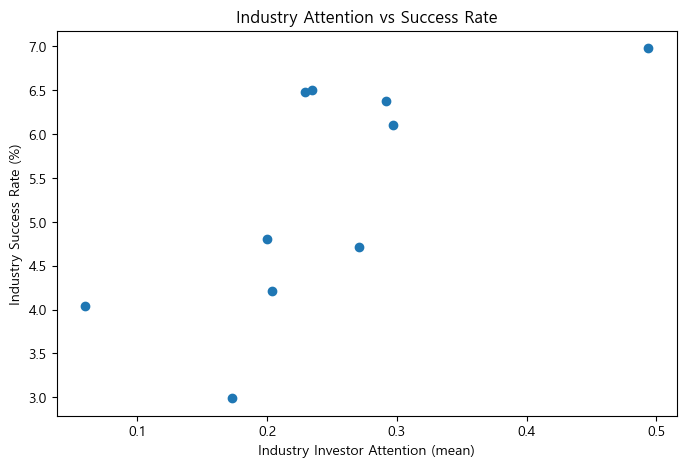

In [73]:
# 시각화: 산업군별 Attention vs 성공률
tmp = industry_stats.copy()

plt.figure(figsize=(8,5))
plt.scatter(tmp["attention_mean"], tmp["success_ratio"])
plt.xlabel("Industry Investor Attention (mean)")
plt.ylabel("Industry Success Rate (%)")
plt.title("Industry Attention vs Success Rate")
plt.show()

<span style="font-size: 15px;">
효과 크기 검증
</span>

In [74]:
import numpy as np
import pandas as pd
import math
from statsmodels.stats.proportion import proportions_ztest

industry_col = "cat_obj_overview"
attention_col = "participants"

# -----------------------------
# 0) 전처리 + 회사 grain 고정(1행=1회사)
# -----------------------------
df0 = s_profile_master.copy()

df0[industry_col] = df0[industry_col].fillna("Unknown")
df0[attention_col] = pd.to_numeric(df0[attention_col], errors="coerce").fillna(0)

df_company = (
    df0.groupby("objects_cfpr_id", as_index=False)
       .agg(
           industry=(industry_col, "first"),         # 산업군 대표값(간단 버전)
           success_flag=("success_flag", "max"),     # 회사가 한 번이라도 성공이면 성공
           attn_mean=(attention_col, "mean"),        # 회사 단위 attention(라운드 평균)
           attn_sum=(attention_col, "sum"),
           n_rounds=(attention_col, "size")
       )
)
assert df_company["objects_cfpr_id"].is_unique

# -----------------------------
# 1) 산업군별 Investor Attention 계산 (회사 기준 평균)
# -----------------------------
industry_stats = (
    df_company.groupby("industry", dropna=False)
      .agg(
          n_companies=("objects_cfpr_id", "nunique"),
          attention_mean=("attn_mean", "mean"),      # 산업군 attention: 회사 attn_mean의 평균
          n_success=("success_flag", "sum")
      )
      .reset_index()
)

industry_stats["success_ratio"] = (industry_stats["n_success"] / industry_stats["n_companies"] * 100).round(3)
display(industry_stats.sort_values("attention_mean", ascending=False))

# -----------------------------
# 2) High Attention 산업군 플래그 (중앙값 기준)
# -----------------------------
cut = industry_stats["attention_mean"].median()
print("Attention 중앙값(컷) =", cut)

high_map = industry_stats.set_index("industry")["attention_mean"].ge(cut)

df_company["high_attention"] = df_company["industry"].map(high_map).fillna(False).astype(bool)

# sanity check
print(df_company["high_attention"].value_counts(dropna=False))

# -----------------------------
# 3) 2표본 비율 Z-test (단측: High > Low)
# -----------------------------
ha_summary = (
    df_company.groupby("high_attention", dropna=False)
      .agg(
          n_companies=("objects_cfpr_id", "nunique"),
          n_success=("success_flag", "sum")
      )
      .reset_index()
)

high_row = ha_summary[ha_summary["high_attention"] == True].iloc[0]
low_row  = ha_summary[ha_summary["high_attention"] == False].iloc[0]

success_counts = np.array([high_row["n_success"], low_row["n_success"]], dtype=float)
nobs = np.array([high_row["n_companies"], low_row["n_companies"]], dtype=float)

z, p = proportions_ztest(success_counts, nobs, alternative="larger")

p_high = success_counts[0] / nobs[0]
p_low  = success_counts[1] / nobs[1]

# -----------------------------
# 4) 효과크기: RD/RR/OR + OR 95% CI
# -----------------------------
# 2x2: a=High 성공, b=High 실패, c=Low 성공, d=Low 실패
a = float(success_counts[0])
c = float(success_counts[1])
b = float(nobs[0] - success_counts[0])
d = float(nobs[1] - success_counts[1])

# 0 셀 보정(필요 시)
if min(a, b, c, d) == 0:
    a, b, c, d = a+0.5, b+0.5, c+0.5, d+0.5

RD = p_high - p_low
RR = p_high / p_low if p_low > 0 else np.inf
OR = (a * d) / (b * c)

log_or = math.log(OR)
se = math.sqrt(1/a + 1/b + 1/c + 1/d)
zcrit = 1.96
ci_low = math.exp(log_or - zcrit * se)
ci_high = math.exp(log_or + zcrit * se)

# -----------------------------
# 5) 출력 + 결론 템플릿(alpha=0.05)
# -----------------------------
alpha = 0.05
print("=== Two Proportion Z-Test (High Attention > Low Attention) ===")
print(f"High : 성공 {int(success_counts[0]):,} / 전체 {int(nobs[0]):,} = {p_high*100:.3f}%")
print(f"Low  : 성공 {int(success_counts[1]):,} / 전체 {int(nobs[1]):,} = {p_low*100:.3f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

print("\n=== Effect Size ===")
print(f"RD (pp) = {RD*100:.3f}%p")
print(f"RR      = {RR:.3f}")
print(f"OR      = {OR:.3f} (95% CI: {ci_low:.3f} ~ {ci_high:.3f})")

if (p < alpha) and (OR > 1):
    print("\n[귀무가설 기각] 산업군 단위 Investor Attention이 높을수록 성공률(오즈)이 유의미하게 높다.")
else:
    print("\n[귀무가설 기각 못함] Investor Attention이 높을수록 성공률이 높다고 결론낼 충분한 증거가 없다.")
    if OR < 1:
        print("  참고: 관측된 효과 방향(OR<1)은 High Attention의 성공 오즈가 더 낮은 방향입니다.")


,industry,n_companies,attention_mean,n_success,success_ratio
4,Health & Wellness,1448,0.493785,101,6.975
8,Social & Community,5022,0.297093,307,6.113
6,Media & Content,5655,0.291247,361,6.384
2,Finance & FinTech,1083,0.270545,51,4.709
9,Software & Technology,174693,0.234697,11353,6.499
5,Marketing & AdTech,2006,0.229312,130,6.481
3,Gaming & Virtual,736,0.203804,31,4.212
0,E-commerce & Retail,2452,0.199837,118,4.812
1,Education & Training,635,0.173228,19,2.992
7,Professional Services,421,0.059382,17,4.038


Attention 중앙값(컷) = 0.2320047522308028
high_attention
True     187901
False      6250
Name: count, dtype: int64
=== Two Proportion Z-Test (High Attention > Low Attention) ===
High : 성공 12,173 / 전체 187,901 = 6.478%
Low  : 성공 315 / 전체 6,250 = 5.040%
z-value: 4.5601, p-value: 2.55602e-06

=== Effect Size ===
RD (pp) = 1.438%p
RR      = 1.285
OR      = 1.305 (95% CI: 1.164 ~ 1.464)

[귀무가설 기각] 산업군 단위 Investor Attention이 높을수록 성공률(오즈)이 유의미하게 높다.


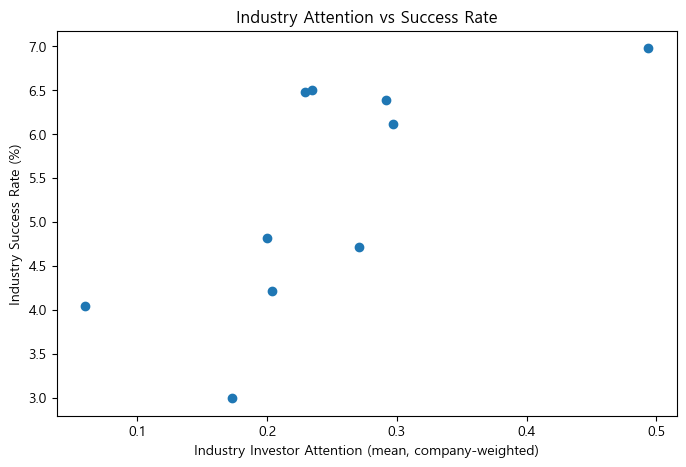

In [75]:
# 시각화: 산업군 Attention vs 성공률
import matplotlib.pyplot as plt

tmp = industry_stats.copy()

plt.figure(figsize=(8,5))
plt.scatter(tmp["attention_mean"], tmp["success_ratio"])
plt.xlabel("Industry Investor Attention (mean, company-weighted)")
plt.ylabel("Industry Success Rate (%)")
plt.title("Industry Attention vs Success Rate")
plt.show()

#### 가설4 스타트업의 산업에 따라 투자 성공률이 달라진다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 전체 차이 존재 여부: 카이제곱 독립성 검정(Industry × Success)<br>
* (유의하면) 어떤 산업끼리 다른지: 사후(pairwise) 비율검정 + 다중비교 보정<br>
</span>

In [76]:
# 산업군별 성공률 요약 
industry_col = "cat_obj_overview"
summary = (
    s_profile_master.groupby([industry_col], dropna=False)
    .apply(lambda x: pd.Series({
        "n_companies": x["objects_cfpr_id"].nunique(),
        "n_success": x.loc[x["success_flag"] == 1, "objects_cfpr_id"].nunique()
    }))
    .reset_index()
)
summary["success_ratio"] = (summary["n_success"] / summary["n_companies"] * 100).round(2)
summary = summary.sort_values("n_companies", ascending=False)
display(summary)

,cat_obj_overview,n_companies,n_success,success_ratio
9,Software & Technology,174693,11353,6.50
6,Media & Content,5655,361,6.38
8,Social & Community,5022,307,6.11
0,E-commerce & Retail,2452,118,4.81
5,Marketing & AdTech,2006,130,6.48
4,Health & Wellness,1448,101,6.98
2,Finance & FinTech,1083,51,4.71
3,Gaming & Virtual,736,31,4.21
1,Education & Training,635,19,2.99
7,Professional Services,421,17,4.04


In [77]:
from scipy.stats import chi2_contingency

# 표본 작은 산업군 제외 (회사 수 기준)
min_n = summary["n_companies"].quantile(0.25)  # 하위 25% 컷
valid_industries = summary.loc[summary["n_companies"] >= min_n, industry_col]

s_profile_master_t = s_profile_master[s_profile_master[industry_col].isin(valid_industries)].copy()

print("검정에 포함된 산업군 수:", s_profile_master_t[industry_col].nunique())
print("검정에 포함된 회사 수(중복 포함):", s_profile_master_t.shape[0])
print("검정에 포함된 회사 수(중복 제거):", s_profile_master_t["objects_cfpr_id"].nunique())

# 카이제곱(Chi-square) 독립성 검정
df_company = (
    s_profile_master_t.groupby("objects_cfpr_id", as_index=False)
    .agg(
        industry=(industry_col, "first"),
        success_flag=("success_flag", "max")
    )
)
df_company = df_company.dropna(subset=["industry", "success_flag"]).copy()
df_company = df_company[df_company["success_flag"].isin([0, 1])].copy()

# 교차표(회사 단위)
ct = pd.crosstab(df_company["industry"], df_company["success_flag"])

chi2, p, dof, expected = chi2_contingency(ct)

alpha = 0.05
print("=== Chi-square Test: industry vs success (company-level) ===")
print("chi2 =", round(chi2, 4), "| dof =", dof, "| p-value =", format(p, ".6g"))

if p < alpha:
    print("[귀무가설 기각] 산업군에 따라 투자 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 산업군에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")

검정에 포함된 산업군 수: 7
검정에 포함된 회사 수(중복 포함): 192359
검정에 포함된 회사 수(중복 제거): 192359
=== Chi-square Test: industry vs success (company-level) ===
chi2 = 18.6422 | dof = 6 | p-value = 0.00481261
[귀무가설 기각] 산업군에 따라 투자 성공률이 유의미하게 다르다.


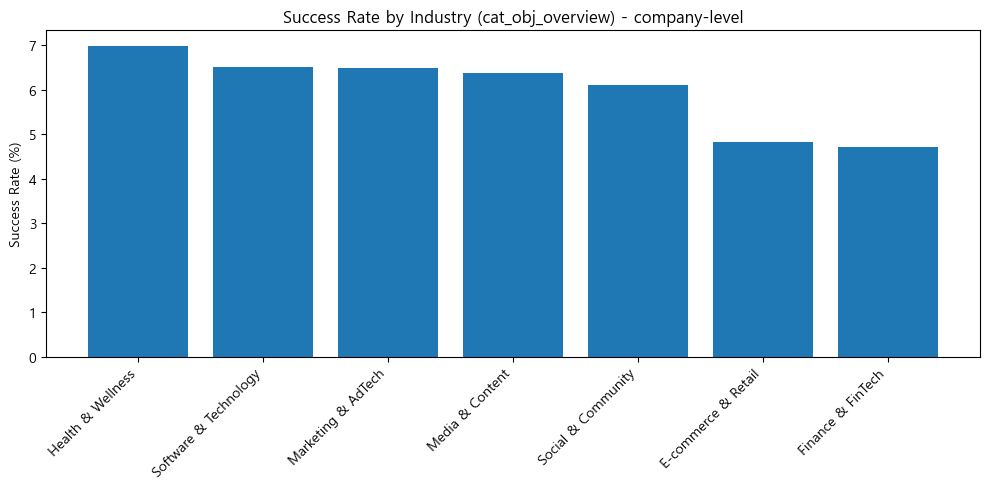

In [78]:
# [시각화] 어떤 산업군이 특히 다른지 파악
plot_df = summary.loc[summary[industry_col].isin(valid_industries)].copy()
plot_df = plot_df.sort_values("success_ratio", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(plot_df[industry_col].astype(str), plot_df["success_ratio"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Success Rate (%)")
plt.title("Success Rate by Industry (cat_obj_overview) - company-level")
plt.tight_layout()
plt.show()

<span style="font-size: 15px;">
효과 크기 검증
</span>

,industry,n_companies,n_success,success_ratio
9,Software & Technology,174693,11353,6.499
6,Media & Content,5655,361,6.384
8,Social & Community,5022,307,6.113
0,E-commerce & Retail,2452,118,4.812
5,Marketing & AdTech,2006,130,6.481
4,Health & Wellness,1448,101,6.975
2,Finance & FinTech,1083,51,4.709
3,Gaming & Virtual,736,31,4.212
1,Education & Training,635,19,2.992
7,Professional Services,421,17,4.038


검정 포함 산업군 수: 7
검정 포함 회사 수: 192359

=== Chi-square Test: industry vs success (company-level) ===
chi2 = 18.6422 | dof = 6 | p-value = 0.00481261
Cramér's V = 0.0098
[귀무가설 기각] 산업군에 따라 투자 성공률이 유의미하게 다르다.

=== Top 10 industries by |standardized residual| (success=1) ===


,std_resid_success
industry,
E-commerce & Retail,-3.205170
Finance & FinTech,-2.263849
Social & Community,-0.959609
Health & Wellness,0.775608
Software & Technology,0.684770
Media & Content,-0.217411
Marketing & AdTech,0.041175



=== Logistic OR vs reference industry: Software & Technology ===


,industry_vs_ref,OR,CI_low,CI_high,p_value
4,"C(industry, Treatment(reference=""Software & Technology""))[T.Health & Wellness]",1.078787,0.880506,1.321719,0.464253
3,"C(industry, Treatment(reference=""Software & Technology""))[T.Marketing & AdTech]",0.996994,0.833783,1.192153,0.973668
0,"C(industry, Treatment(reference=""Software & Technology""))[T.Media & Content]",0.981082,0.880383,1.093299,0.729600
1,"C(industry, Treatment(reference=""Software & Technology""))[T.Social & Community]",0.936782,0.833346,1.053057,0.273977
2,"C(industry, Treatment(reference=""Software & Technology""))[T.E-commerce & Retail]",0.727383,0.603981,0.875997,0.000792
5,"C(industry, Treatment(reference=""Software & Technology""))[T.Finance & FinTech]",0.711005,0.536403,0.942439,0.017677


,industry_name,success_rate,RD_pp_vs_ref,RR_vs_ref,OR,CI_low,CI_high,p_value
4,Health & Wellness,0.069751,0.476309,1.073291,1.078787,0.880506,1.321719,0.464253
3,Marketing & AdTech,0.064806,-0.018271,0.997189,0.996994,0.833783,1.192153,0.973668
0,Media & Content,0.063837,-0.115098,0.982289,0.981082,0.880383,1.093299,0.729600
1,Social & Community,0.061131,-0.385727,0.940647,0.936782,0.833346,1.053057,0.273977
2,E-commerce & Retail,0.048124,-1.686431,0.740502,0.727383,0.603981,0.875997,0.000792
5,Finance & FinTech,0.047091,-1.789688,0.724614,0.711005,0.536403,0.942439,0.017677


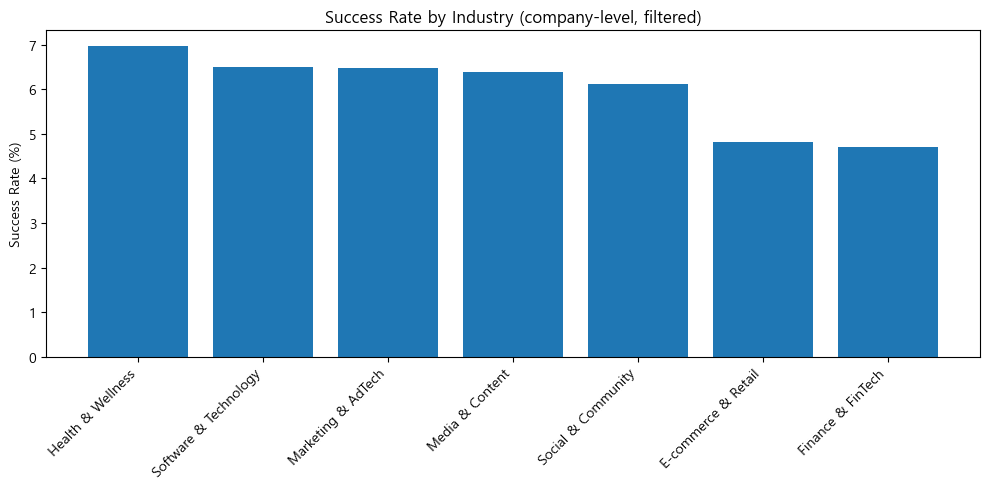

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf

industry_col = "cat_obj_overview"

# -----------------------------
# 0) 회사 grain 고정 (1행=1회사)
# -----------------------------
df0 = s_profile_master.copy()
df0[industry_col] = df0[industry_col].fillna("Unknown")

df_company = (
    df0.groupby("objects_cfpr_id", as_index=False)
       .agg(
           industry=(industry_col, "first"),      # 회사 산업군 대표값
           success_flag=("success_flag", "max")   # 회사가 한 번이라도 성공이면 성공
       )
)

df_company = df_company.dropna(subset=["industry", "success_flag"]).copy()
df_company = df_company[df_company["success_flag"].isin([0, 1])].copy()
df_company["success_flag"] = df_company["success_flag"].astype(int)

assert df_company["objects_cfpr_id"].is_unique

# -----------------------------
# 1) 산업군별 성공률 요약 (회사 단위)
# -----------------------------
summary = (
    df_company.groupby("industry", dropna=False)
      .agg(
          n_companies=("objects_cfpr_id", "nunique"),
          n_success=("success_flag", "sum")
      )
      .reset_index()g
)
summary["success_ratio"] = (summary["n_success"] / summary["n_companies"] * 100).round(3)
summary = summary.sort_values("n_companies", ascending=False)
display(summary)

# -----------------------------
# 2) 표본 작은 산업군 처리(현재 방식 유지: 하위 25% 컷으로 제외)
#    ※ 대안: 희소 산업군을 Other로 묶는 방법도 있음(원하면 제공)
# -----------------------------
min_n = summary["n_companies"].quantile(0.25)  # 하위 25% 컷
valid_industries = summary.loc[summary["n_companies"] >= min_n, "industry"]

df_test = df_company[df_company["industry"].isin(valid_industries)].copy()

print("검정 포함 산업군 수:", df_test["industry"].nunique())
print("검정 포함 회사 수:", df_test.shape[0])

# -----------------------------
# 3) Chi-square 독립성 검정 + 효과크기(Cramér's V)
# -----------------------------
ct = pd.crosstab(df_test["industry"], df_test["success_flag"])  # (산업군 x 성공여부)
chi2, p, dof, expected = chi2_contingency(ct)

n = ct.to_numpy().sum()
# Cramér's V = sqrt(chi2 / (n * (min(r-1, c-1))))
r, c = ct.shape
cramers_v = np.sqrt(chi2 / (n * min(r-1, c-1)))

alpha = 0.05
print("\n=== Chi-square Test: industry vs success (company-level) ===")
print(f"chi2 = {chi2:.4f} | dof = {dof} | p-value = {p:.6g}")
print(f"Cramér's V = {cramers_v:.4f}")

if p < alpha:
    print("[귀무가설 기각] 산업군에 따라 투자 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 산업군에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")

# -----------------------------
# 4) 어떤 산업군이 특히 다른지: 표준화 잔차(standardized residual)
#    - (+)면 관측 성공이 기대보다 많음(성공률 상대적으로 높음)
#    - (-)면 관측 성공이 기대보다 적음(성공률 상대적으로 낮음)
# -----------------------------
exp = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
resid = (ct - exp) / np.sqrt(exp)

# 성공(1) 기준 잔차로 "특히 다른 산업" 뽑기
resid_success = resid[1].sort_values(key=lambda s: s.abs(), ascending=False)

topk = 10
print(f"\n=== Top {topk} industries by |standardized residual| (success=1) ===")
display(resid_success.head(topk).to_frame("std_resid_success"))

# -----------------------------
# 5) 산업별 OR/CI: 로지스틱 회귀 (참조군 대비 OR)
#    - 참조군(reference)은 표본 가장 큰 산업군으로 두는 것이 해석상 안정적
# -----------------------------
ref_industry = summary.loc[summary["industry"].isin(valid_industries)].iloc[0]["industry"]
df_test["industry"] = pd.Categorical(df_test["industry"], categories=valid_industries.tolist())

# reference 지정: Treatment(reference="...")
formula = f'success_flag ~ C(industry, Treatment(reference="{ref_industry}"))'
m = smf.logit(formula, data=df_test).fit(disp=False)

# OR / 95% CI 추출
params = m.params
conf = m.conf_int()
pvals = m.pvalues

rows = []
for term in params.index:
    if term == "Intercept":
        continue
    beta = params[term]
    lo, hi = conf.loc[term]
    rows.append({
        "industry_vs_ref": term,                 # "C(industry,...)[T.xxx]" 형태
        "OR": float(np.exp(beta)),
        "CI_low": float(np.exp(lo)),
        "CI_high": float(np.exp(hi)),
        "p_value": float(pvals[term])
    })

or_table = pd.DataFrame(rows).sort_values("OR", ascending=False)

print(f"\n=== Logistic OR vs reference industry: {ref_industry} ===")
display(or_table)

# (참고) RD/RR도 같이 보고 싶다면: 각 산업 성공률을 ref와 비교해서 계산
rate_map = (df_test.groupby("industry")["success_flag"].mean()).to_dict()
ref_rate = rate_map.get(ref_industry, np.nan)

or_table["industry_name"] = (
    or_table["industry_vs_ref"]
      .str.extract(r"\[T\.(.*)\]")[0]
)

or_table["success_rate"] = or_table["industry_name"].map(rate_map)
or_table["RD_pp_vs_ref"] = (or_table["success_rate"] - ref_rate) * 100
or_table["RR_vs_ref"] = (or_table["success_rate"] / ref_rate) if ref_rate > 0 else np.nan

display(or_table[["industry_name","success_rate","RD_pp_vs_ref","RR_vs_ref","OR","CI_low","CI_high","p_value"]]
        .sort_values("OR", ascending=False))

# -----------------------------
# 6) 시각화: 산업군별 성공률 (검정 포함 산업군만)
# -----------------------------
plot_df = summary[summary["industry"].isin(valid_industries)].copy()
plot_df = plot_df.sort_values("success_ratio", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(plot_df["industry"].astype(str), plot_df["success_ratio"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Success Rate (%)")
plt.title("Success Rate by Industry (company-level, filtered)")
plt.tight_layout()
plt.show()


#### 가설5 산업별로 스타트업의 생존시간(설립일부터 폐업까지)은 유의미한 차이가 있다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 여러 산업군(범주) × 연속형(기간)<br>
* 기간이 치우친 경우가 많음: Kruskal–Wallis 검정(비모수)<br>
</span>

In [80]:
print(s_profile_master["closed_at"].isna().sum())
print(s_profile_master["founded_at"].isna().sum())
print(s_profile_master["first_funding_at"].isna().sum())

191536
103643
162717


#### 가설6 동일한 산업내에 지역별로 스타트업 성공률에 유의한 차이가 있다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 여러 산업군(범주) × 연속형(기간)<br>
* 기간이 치우친 경우가 많음: Kruskal–Wallis 검정(비모수)<br>
</span>

In [81]:
# 사용 컬럼 지정
industry_col = "cat_obj_overview"
state_col   = "obj_state_filled"

In [82]:
# 중복제거
df_company = (
    s_profile_master.groupby("objects_cfpr_id", as_index=False)
    .agg(
        industry=(industry_col, "first"),
        state=(state_col, "first"),
        success_flag=("success_flag", "max")
    )
)

df_company["success_flag"] = pd.to_numeric(df_company["success_flag"], errors="coerce").astype("Int64")  
df_company = df_company.dropna(subset=["industry", "state", "success_flag"]).copy()
df_company = df_company[df_company["success_flag"].isin([0, 1])].copy()

print("전체 회사 수:", df_company.shape[0])
print("산업군 수:", df_company["industry"].nunique())
print("지역(state) 수:", df_company["state"].nunique())

전체 회사 수: 51434
산업군 수: 10
지역(state) 수: 54


In [83]:
# 산업군별 Chi-square 검정 (자동 반복) 
# 각 산업군 안에서 표본이 작은 state는 Other로 통합(하위25%)

alpha = 0.05
results = []

for ind, g in df_company.groupby("industry"):
    # 산업군 내 state가 2개 미만이면 검정 불가
    if g["state"].nunique() < 2:
        continue

    # 산업군 내 state별 회사 수(회사 단위)
    state_counts = g["state"].value_counts()
    thr = state_counts.quantile(0.25)  # 하위25% 기준(설명 가능)
    rare_states = state_counts[state_counts <= thr].index

    # 희소 state를 Other로 통합
    g = g.copy()
    g["state2"] = np.where(g["state"].isin(rare_states), "Other", g["state"])

    # 통합 후에도 state가 2개 미만이면 검정 불가
    if g["state2"].nunique() < 2:
        continue

    # 교차표(회사 단위)
    ct = pd.crosstab(g["state2"], g["success_flag"])

    # 0/1 컬럼 보장
    for col in [0, 1]:
        if col not in ct.columns:
            ct[col] = 0
    ct = ct[[0, 1]]

    # 검정 가능 조건: 성공(1)도 있고 실패(0)도 있어야 함
    if ct[0].sum() == 0 or ct[1].sum() == 0:
        # 한쪽 클래스가 아예 없으면 chi-square 불가
        print(f"산업군 '{ind}'는 성공/실패 한쪽만 존재하여 chi-square 불가")
        continue

    chi2, p, dof, expected = chi2_contingency(ct)

    results.append({
        "industry": ind,
        "n_companies": int(g.shape[0]),
        "n_states_raw": int(state_counts.shape[0]),
        "n_states_after": int(g["state2"].nunique()),
        "state_thr_q25": float(thr),
        "chi2": chi2,
        "dof": dof,
        "p_value": p,
        "conclusion": "[귀무가설 기각]" if p < alpha else "[귀무가설 기각 못함]"
    })

res_df = pd.DataFrame(results).sort_values("p_value")
display(res_df)

,industry,n_companies,n_states_raw,n_states_after,state_thr_q25,chi2,dof,p_value,conclusion
9,Software & Technology,44427,54,41,87.0,502.604564,40,2.590804e-81,[귀무가설 기각]
8,Social & Community,1747,48,36,6.0,66.488138,35,1.035156e-03,[귀무가설 기각]
4,Health & Wellness,805,49,36,2.0,49.598500,35,5.201945e-02,[귀무가설 기각 못함]
5,Marketing & AdTech,767,47,34,2.0,38.311139,33,2.410957e-01,[귀무가설 기각 못함]
2,Finance & FinTech,389,41,25,2.0,26.209384,24,3.426268e-01,[귀무가설 기각 못함]
6,Media & Content,1995,49,37,4.0,33.936312,36,5.670890e-01,[귀무가설 기각 못함]
7,Professional Services,131,29,21,1.0,18.192820,20,5.747078e-01,[귀무가설 기각 못함]
0,E-commerce & Retail,791,47,34,3.0,29.156179,33,6.590504e-01,[귀무가설 기각 못함]
1,Education & Training,199,41,28,1.0,23.243682,27,6.718542e-01,[귀무가설 기각 못함]
3,Gaming & Virtual,183,35,26,1.0,15.818082,25,9.201386e-01,[귀무가설 기각 못함]


target_industry = Software & Technology


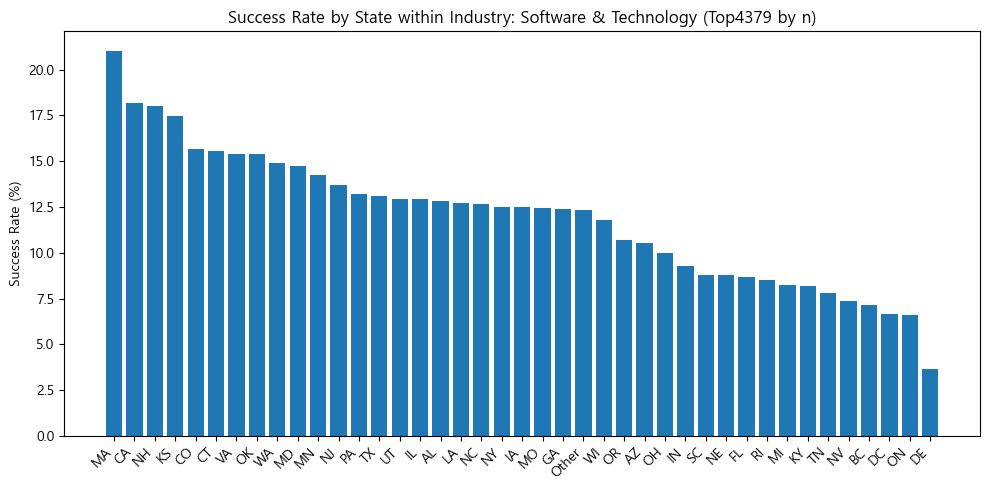

,state2,n_companies,success_rate,success_ratio
16,MA,2595,0.210405,21.04
3,CA,14154,0.181715,18.17
23,NH,200,0.18,18.0
13,KS,149,0.174497,17.45
4,CO,1036,0.156371,15.64
5,CT,462,0.155844,15.58
38,VA,1008,0.15377,15.38
28,OK,117,0.153846,15.38
39,WA,1639,0.148871,14.89
17,MD,658,0.147416,14.74


In [84]:
# 유의한 산업군(Software & Technology)의 지역별 성공률 보기

# p-value 가장 작은 산업군 자동 선택(원하면 문자열로 직접 지정)
target_industry = res_df.iloc[0]["industry"]
print("target_industry =", target_industry)

sub = df_company[df_company["industry"] == target_industry].copy()

# 같은 규칙으로 Other 통합(하위25%)
state_counts = sub["state"].value_counts()
thr = state_counts.quantile(0.25)
rare_states = state_counts[state_counts <= thr].index
sub["state2"] = np.where(sub["state"].isin(rare_states), "Other", sub["state"])

# 지역별 성공률(회사 단위)
state_summary = (
    sub.groupby("state2")["success_flag"]
      .agg(n_companies="count", success_rate="mean")
      .reset_index()
)
state_summary["success_ratio"] = (state_summary["success_rate"] * 100).round(2)

# 표본수 상위 25% 기준선(Q3)
topk = int(ind_counts.quantile(0.75))
plot_df = state_summary.sort_values("n_companies", ascending=False).head(topk)
plot_df = plot_df.sort_values("success_ratio", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(plot_df["state2"].astype(str), plot_df["success_ratio"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Success Rate (%)")
plt.title(f"Success Rate by State within Industry: {target_industry} (Top{topk} by n)")
plt.tight_layout()
plt.show()

display(plot_df)

<span style="font-size: 15px;">
효과 크기 검증
</span>

In [85]:
# 회사 grain 고정 (1행=1회사)
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests

industry_col = "cat_obj_overview"
state_col = "obj_state_filled"

df0 = s_profile_master.copy()
df0[industry_col] = df0[industry_col].fillna("Unknown")
df0[state_col] = df0[state_col].fillna("Unknown")

df_company = (
    df0.groupby("objects_cfpr_id", as_index=False)
       .agg(
           industry=(industry_col, "first"),
           state=(state_col, "first"),
           success_flag=("success_flag", "max")
       )
)

df_company["success_flag"] = pd.to_numeric(df_company["success_flag"], errors="coerce")
df_company = df_company.dropna(subset=["industry", "state", "success_flag"]).copy()
df_company = df_company[df_company["success_flag"].isin([0, 1])].copy()
df_company["success_flag"] = df_company["success_flag"].astype(int)

assert df_company["objects_cfpr_id"].is_unique

print("전체 회사 수:", df_company.shape[0])
print("산업군 수:", df_company["industry"].nunique())
print("지역(state) 수:", df_company["state"].nunique())


전체 회사 수: 194151
산업군 수: 10
지역(state) 수: 55


In [86]:
# 산업군별 Chi-square + 효과크기(Cramér’s V) + 희소 state Other 통합
alpha = 0.05
results = []

for ind, g in df_company.groupby("industry"):
    g = g.copy()

    # 산업군 내 state 2개 미만이면 비교 자체가 불가
    if g["state"].nunique() < 2:
        continue

    # 희소 state를 Other로 통합(하위 25% 컷) — 소희님 방식 유지
    state_counts = g["state"].value_counts()
    thr = state_counts.quantile(0.25)
    rare_states = state_counts[state_counts <= thr].index
    g["state2"] = np.where(g["state"].isin(rare_states), "Other", g["state"])

    if g["state2"].nunique() < 2:
        continue

    # 교차표
    ct = pd.crosstab(g["state2"], g["success_flag"])
    for col in [0, 1]:
        if col not in ct.columns:
            ct[col] = 0
    ct = ct[[0, 1]]

    # 성공/실패 한쪽만 있으면 chi-square 불가
    if ct[0].sum() == 0 or ct[1].sum() == 0:
        continue

    chi2, p, dof, expected = chi2_contingency(ct)

    # 효과크기: Cramér's V (2열이므로 min(r-1, c-1)=1)
    n = ct.to_numpy().sum()
    r, c = ct.shape
    v = math.sqrt(chi2 / (n * min(r-1, c-1))) if n > 0 else np.nan

    results.append({
        "industry": ind,
        "n_companies": int(g.shape[0]),
        "n_states_raw": int(state_counts.shape[0]),
        "n_states_after": int(g["state2"].nunique()),
        "state_thr_q25": float(thr),
        "chi2": float(chi2),
        "dof": int(dof),
        "p_value": float(p),
        "cramers_v": float(v)
    })

res_df = pd.DataFrame(results).sort_values("p_value")

# 다중비교 보정(FDR) 추가
if not res_df.empty:
    rej, p_adj, _, _ = multipletests(res_df["p_value"].values, alpha=alpha, method="fdr_bh")
    res_df["p_adj_fdr"] = p_adj
    res_df["conclusion_fdr"] = np.where(res_df["p_adj_fdr"] < alpha, "[귀무가설 기각]", "[귀무가설 기각 못함]")
    res_df["conclusion_raw"] = np.where(res_df["p_value"] < alpha, "[귀무가설 기각]", "[귀무가설 기각 못함]")

display(res_df)


,industry,n_companies,n_states_raw,n_states_after,state_thr_q25,chi2,dof,p_value,cramers_v,p_adj_fdr,conclusion_fdr,conclusion_raw
9,Software & Technology,174693,55,42,90.00,7490.802923,41,0.000000e+00,0.207074,0.000000e+00,[귀무가설 기각],[귀무가설 기각]
8,Social & Community,5022,49,37,6.00,180.854272,36,3.335208e-21,0.189769,1.667604e-20,[귀무가설 기각],[귀무가설 기각]
6,Media & Content,5655,50,38,4.25,130.482856,37,2.382090e-12,0.151901,7.940299e-12,[귀무가설 기각],[귀무가설 기각]
5,Marketing & AdTech,2006,48,35,2.00,88.292010,34,1.030080e-06,0.209795,2.575201e-06,[귀무가설 기각],[귀무가설 기각]
0,E-commerce & Retail,2452,48,35,3.00,83.452972,34,4.842902e-06,0.184485,9.685805e-06,[귀무가설 기각],[귀무가설 기각]
4,Health & Wellness,1448,50,37,2.00,82.340871,36,1.725941e-05,0.238464,2.876568e-05,[귀무가설 기각],[귀무가설 기각]
2,Finance & FinTech,1083,42,26,2.00,57.212890,25,2.503056e-04,0.229844,3.575794e-04,[귀무가설 기각],[귀무가설 기각]
7,Professional Services,421,30,22,1.00,39.448660,21,8.671638e-03,0.306108,1.083955e-02,[귀무가설 기각],[귀무가설 기각]
3,Gaming & Virtual,736,36,27,1.00,39.087859,26,4.782052e-02,0.230453,5.313391e-02,[귀무가설 기각 못함],[귀무가설 기각]
1,Education & Training,635,42,29,1.00,36.917555,28,1.206899e-01,0.241118,1.206899e-01,[귀무가설 기각 못함],[귀무가설 기각 못함]


In [87]:
# 유의한 산업군(또는 관심 산업군) 1개 선택 → OR/CI + RD/RR + 잔차로 원인 진단
if res_df.empty:
    raise ValueError("검정 가능한 산업군이 없습니다. (state가 2개 미만이거나 성공/실패 한쪽만 존재 등)")

# 1) FDR 유의한 산업군이 있으면 그 중 최상위, 없으면 raw p 최상위
sig = res_df[res_df.get("p_adj_fdr", 1.0) < alpha] if "p_adj_fdr" in res_df.columns else pd.DataFrame()
target_industry = (sig.iloc[0]["industry"] if not sig.empty else res_df.iloc[0]["industry"])
print("target_industry =", target_industry)

sub = df_company[df_company["industry"] == target_industry].copy()

# 동일 규칙으로 Other 통합
state_counts = sub["state"].value_counts()
thr = state_counts.quantile(0.25)
rare_states = state_counts[state_counts <= thr].index
sub["state2"] = np.where(sub["state"].isin(rare_states), "Other", sub["state"])

# (A) 지역별 성공률 요약
state_summary = (
    sub.groupby("state2")["success_flag"]
       .agg(n_companies="count", success_rate="mean")
       .reset_index()
)
state_summary["success_ratio"] = (state_summary["success_rate"] * 100).round(3)
display(state_summary.sort_values("n_companies", ascending=False))


target_industry = Software & Technology


,state2,n_companies,success_rate,success_ratio
38,Unknown,130266,0.037308,3.731
3,CA,14154,0.181715,18.172
26,NY,4766,0.125052,12.505
16,MA,2595,0.210405,21.040
36,TX,2402,0.131141,13.114
8,FL,1799,0.086715,8.671
40,WA,1639,0.148871,14.887
11,IL,1459,0.129541,12.954
32,PA,1135,0.132159,13.216
4,CO,1036,0.156371,15.637


In [88]:
# 표준화 잔차로 “어떤 지역이 다르게 기여하는지” 보기
ct = pd.crosstab(sub["state2"], sub["success_flag"])
for col in [0, 1]:
    if col not in ct.columns:
        ct[col] = 0
ct = ct[[0, 1]]

chi2, p, dof, expected = chi2_contingency(ct)

exp = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
resid = (ct - exp) / np.sqrt(exp)

# 성공(1) 기준 잔차(절댓값 큰 순)
resid_success = resid[1].sort_values(key=lambda s: s.abs(), ascending=False)
print("=== Top states by |standardized residual| (success=1) ===")
display(resid_success.head(10).to_frame("std_resid_success"))


=== Top states by |standardized residual| (success=1) ===


,std_resid_success
state2,
CA,54.474570
Unknown,-39.189013
MA,29.057905
NY,16.265779
WA,13.321272
TX,12.717879
CO,11.537845
VA,11.056952
IL,9.672151


In [89]:
# OR/CI + RD/RR: state 범주 로지스틱 회귀(참조지역 대비)
# reference state = 표본 최다
ref_state = state_summary.sort_values("n_companies", ascending=False).iloc[0]["state2"]
print("reference state =", ref_state)

# 범주형 지정(고정된 기준을 위해)
sub["state2"] = pd.Categorical(sub["state2"])

formula = f'success_flag ~ C(state2, Treatment(reference="{ref_state}"))'
m = smf.logit(formula, data=sub).fit(disp=False)

params = m.params
conf = m.conf_int()
pvals = m.pvalues

rows = []
rate_map = sub.groupby("state2")["success_flag"].mean().to_dict()
ref_rate = rate_map.get(ref_state, np.nan)

for term in params.index:
    if term == "Intercept":
        continue
    beta = params[term]
    lo, hi = conf.loc[term]

    # term에서 state 이름 추출
    st_name = pd.Series([term]).str.extract(r"\[T\.(.*)\]")[0].iloc[0]

    st_rate = rate_map.get(st_name, np.nan)
    rows.append({
        "state_vs_ref": term,
        "state": st_name,
        "success_rate": float(st_rate),
        "RD_pp_vs_ref": float((st_rate - ref_rate) * 100),
        "RR_vs_ref": float(st_rate / ref_rate) if (ref_rate is not np.nan and ref_rate > 0) else np.nan,
        "OR": float(np.exp(beta)),
        "CI_low": float(np.exp(lo)),
        "CI_high": float(np.exp(hi)),
        "p_value": float(pvals[term])
    })

or_table = pd.DataFrame(rows).sort_values("OR", ascending=False)
display(or_table)


reference state = Unknown


,state_vs_ref,state,success_rate,RD_pp_vs_ref,RR_vs_ref,OR,CI_low,CI_high,p_value
16,"C(state2, Treatment(reference=""Unknown""))[T.MA]",MA,0.210405,17.309635,5.639623,6.875950,6.230032,7.588836,0.000000e+00
3,"C(state2, Treatment(reference=""Unknown""))[T.CA]",CA,0.181715,14.440714,4.870646,5.730196,5.442875,6.032683,0.000000e+00
23,"C(state2, Treatment(reference=""Unknown""))[T.NH]",NH,0.180000,14.269172,4.824667,5.664228,3.944404,8.133921,5.855663e-21
13,"C(state2, Treatment(reference=""Unknown""))[T.KS]",KS,0.174497,13.718837,4.677156,5.454441,3.569412,8.334967,4.458956e-15
4,"C(state2, Treatment(reference=""Unknown""))[T.CO]",CO,0.156371,11.906238,4.191313,4.782838,4.034767,5.669604,1.043690e-72
5,"C(state2, Treatment(reference=""Unknown""))[T.CT]",CT,0.155844,11.853588,4.177201,4.763761,3.698794,6.135356,1.168124e-33
28,"C(state2, Treatment(reference=""Unknown""))[T.OK]",OK,0.153846,11.653788,4.123647,4.691582,2.836983,7.758576,1.714018e-09
38,"C(state2, Treatment(reference=""Unknown""))[T.VA]",VA,0.153770,11.646156,4.121601,4.688832,3.941915,5.577276,3.229153e-68
39,"C(state2, Treatment(reference=""Unknown""))[T.WA]",WA,0.148871,11.156299,3.990301,4.513336,3.927667,5.186336,3.206712e-100
17,"C(state2, Treatment(reference=""Unknown""))[T.MD]",MD,0.147416,11.010814,3.951306,4.461603,3.589772,5.545172,2.009679e-41


In [90]:
# 결론 템플릿(산업군 내 지역 차이)
alpha = 0.05
print("=== Chi-square within industry ===")
print(f"industry = {target_industry}")
print(f"chi2 = {chi2:.4f} | dof = {dof} | p-value = {p:.6g}")

# 산업군 내 효과크기(Cramér's V)
n = ct.to_numpy().sum()
r, c = ct.shape
v = math.sqrt(chi2 / (n * min(r-1, c-1))) if n > 0 else np.nan
print(f"Cramér's V = {v:.4f}")

if p < alpha:
    print("[귀무가설 기각] 동일 산업 내에서도 지역(state)에 따라 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 동일 산업 내 지역별 성공률 차이가 있다고 결론낼 충분한 증거가 없다.")


=== Chi-square within industry ===
industry = Software & Technology
chi2 = 7490.8029 | dof = 41 | p-value = 0
Cramér's V = 0.2071
[귀무가설 기각] 동일 산업 내에서도 지역(state)에 따라 성공률이 유의미하게 다르다.


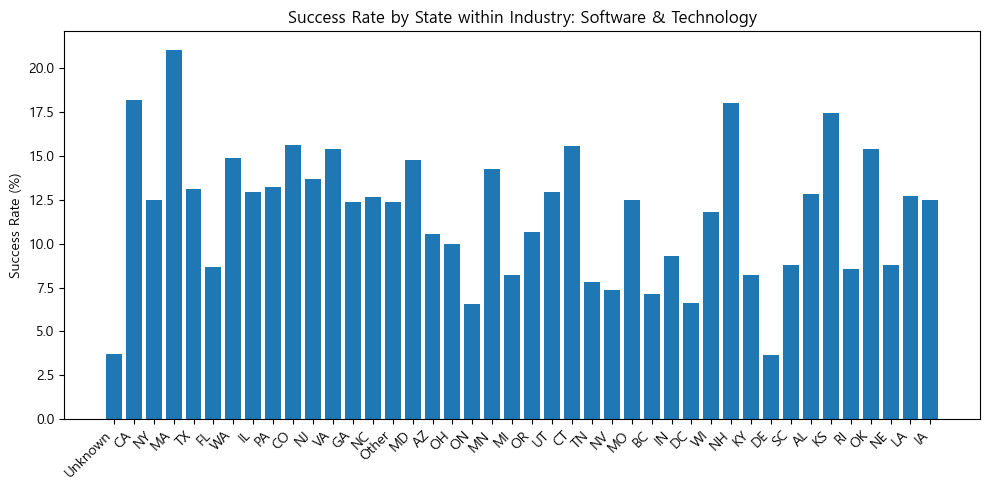

,state2,n_companies,success_rate,success_ratio
16,MA,2595,0.210405,21.040
3,CA,14154,0.181715,18.172
23,NH,200,0.180000,18.000
13,KS,149,0.174497,17.450
4,CO,1036,0.156371,15.637
5,CT,462,0.155844,15.584
28,OK,117,0.153846,15.385
39,VA,1008,0.153770,15.377
40,WA,1639,0.148871,14.887
17,MD,658,0.147416,14.742


In [91]:
# 시각화(타겟 산업군 내 지역별 성공률)
plot_df = state_summary.sort_values("n_companies", ascending=False).copy()

plt.figure(figsize=(10, 5))
plt.bar(plot_df["state2"].astype(str), plot_df["success_ratio"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Success Rate (%)")
plt.title(f"Success Rate by State within Industry: {target_industry}")
plt.tight_layout()
plt.show()

display(plot_df.sort_values("success_ratio", ascending=False))


#### 가설6-1 사무실 분포에 따라 성공률에 유의한 차이가 있다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 단일 사무실 vs 다수 사무실<br>
* Two Proportion Z-Test (양측, two-sided)<br>
</span>

In [92]:
# 사무실 분포 그룹 만들기 (n_offices>=2)
s_profile_master["is_distributed_office"] = s_profile_master["n_offices"].fillna(0) >= 2

# 그룹별 성공률 요약(표본수/성공수/성공률) - 회사 단위
off_summary = (
    s_profile_master.groupby(["is_distributed_office"], dropna=False)
    .apply(lambda x: pd.Series({
        "n_companies": x["objects_cfpr_id"].nunique(),
        "n_success": x.loc[x["success_flag"] == 1, "objects_cfpr_id"].nunique()
    }))
    .reset_index()
)

off_summary["success_ratio"] = (off_summary["n_success"] / off_summary["n_companies"] * 100).round(2)
display(off_summary)

,is_distributed_office,n_companies,n_success,success_ratio
0,False,185609,11542,6.22
1,True,8542,946,11.07


In [93]:
# Two Proportion Z-Test (회사 단위)
dist_row = off_summary[off_summary["is_distributed_office"] == True].iloc[0]
single_row = off_summary[off_summary["is_distributed_office"] == False].iloc[0]

success_counts = np.array([dist_row["n_success"], single_row["n_success"]])
nobs           = np.array([dist_row["n_companies"], single_row["n_companies"]])

z, p = proportions_ztest(success_counts, nobs, alternative="two-sided")  # 양측: 차이가 있다

alpha = 0.05
print("=== Two Proportion Z-Test (사무실 분포형 vs 단일) ===")
print(f"분포형(True) : 성공 {int(success_counts[0]):,} / 전체 {int(nobs[0]):,} = {success_counts[0]/nobs[0]*100:.2f}%")
print(f"단일(False) : 성공 {int(success_counts[1]):,} / 전체 {int(nobs[1]):,} = {success_counts[1]/nobs[1]*100:.2f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] 사무실 분포(사무실 수)에 따라 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 사무실 분포(사무실 수)에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (사무실 분포형 vs 단일) ===
분포형(True) : 성공 946 / 전체 8,542 = 11.07%
단일(False) : 성공 11,542 / 전체 185,609 = 6.22%
z-value: 17.8883, p-value: 1.45413e-71
[귀무가설 기각] 사무실 분포(사무실 수)에 따라 성공률이 유의미하게 다르다.


<span style="font-size: 15px;">
효과 크기 검증
</span>

In [94]:
# 회사 단위로 고정 + 분포형 플래그 생성
import numpy as np
import pandas as pd
import math
from statsmodels.stats.proportion import proportions_ztest

# 1) 회사 grain 고정(1행=1회사)
df_company = (
    s_profile_master.assign(n_offices_num=lambda d: pd.to_numeric(d["n_offices"], errors="coerce").fillna(0))
      .groupby("objects_cfpr_id", as_index=False)
      .agg(
          n_offices=("n_offices_num", "max"),     # 회사의 사무실 수 대표값(최대치)
          success_flag=("success_flag", "max")    # 회사 성공(한 번이라도 성공이면 1)
      )
)

df_company = df_company.dropna(subset=["success_flag"]).copy()
df_company = df_company[df_company["success_flag"].isin([0, 1])].copy()
df_company["success_flag"] = df_company["success_flag"].astype(int)

# 2) 분포형(사무실>=2)
df_company["is_distributed_office"] = df_company["n_offices"] >= 2


In [95]:
#그룹별 성공률 요약 (표는 필요한 컬럼만)
off_summary = (
    df_company.groupby("is_distributed_office")
      .agg(
          n_companies=("objects_cfpr_id", "nunique"),
          n_success=("success_flag", "sum")
      )
      .reset_index()
)

off_summary["success_rate"] = off_summary["n_success"] / off_summary["n_companies"]
off_summary["success_ratio"] = (off_summary["success_rate"] * 100).round(3)

# 요청: 해석에 필요한 컬럼만
display(off_summary[["is_distributed_office", "n_companies", "n_success", "success_ratio"]])


,is_distributed_office,n_companies,n_success,success_ratio
0,False,185609,11542,6.218
1,True,8542,946,11.075


In [96]:
# Two-proportion Z-test (양측) + 효과크기(RD/RR/OR + OR 95% CI) + 결론
# 그룹 row
dist_row   = off_summary[off_summary["is_distributed_office"] == True].iloc[0]
single_row = off_summary[off_summary["is_distributed_office"] == False].iloc[0]

success_counts = np.array([dist_row["n_success"], single_row["n_success"]], dtype=float)
nobs = np.array([dist_row["n_companies"], single_row["n_companies"]], dtype=float)

# 양측: 차이가 있다
z, p = proportions_ztest(success_counts, nobs, alternative="two-sided")

# 성공률
p_dist = success_counts[0] / nobs[0]
p_single = success_counts[1] / nobs[1]

# 효과크기
RD = p_dist - p_single
RR = (p_dist / p_single) if p_single > 0 else np.inf

# OR 및 95% CI(2x2)
a = float(success_counts[0])          # distributed success
b = float(nobs[0] - success_counts[0])# distributed fail
c = float(success_counts[1])          # single success
d = float(nobs[1] - success_counts[1])# single fail

# 0 셀 보정(필요 시)
if min(a, b, c, d) == 0:
    a, b, c, d = a+0.5, b+0.5, c+0.5, d+0.5

OR = (a * d) / (b * c)

log_or = math.log(OR)
se = math.sqrt(1/a + 1/b + 1/c + 1/d)
zcrit = 1.96
ci_low = math.exp(log_or - zcrit * se)
ci_high = math.exp(log_or + zcrit * se)

alpha = 0.05

print("=== Two Proportion Z-Test (Distributed vs Single, two-sided) ===")
print(f"Distributed(True): 성공 {int(success_counts[0]):,} / 전체 {int(nobs[0]):,} = {p_dist*100:.3f}%")
print(f"Single(False)    : 성공 {int(success_counts[1]):,} / 전체 {int(nobs[1]):,} = {p_single*100:.3f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

print("\n=== Effect Size ===")
print(f"RD (pp) = {RD*100:.3f}%p")
print(f"RR      = {RR:.3f}")
print(f"OR      = {OR:.3f} (95% CI: {ci_low:.3f} ~ {ci_high:.3f})")

# 결론 템플릿(양측)
if p < alpha:
    print("\n[귀무가설 기각] 사무실 분포(사무실 수)에 따라 성공률이 유의미하게 다르다.")
else:
    print("\n[귀무가설 기각 못함] 사무실 분포(사무실 수)에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")


=== Two Proportion Z-Test (Distributed vs Single, two-sided) ===
Distributed(True): 성공 946 / 전체 8,542 = 11.075%
Single(False)    : 성공 11,542 / 전체 185,609 = 6.218%
z-value: 17.8883, p-value: 1.45413e-71

=== Effect Size ===
RD (pp) = 4.856%p
RR      = 1.781
OR      = 1.878 (95% CI: 1.751 ~ 2.015)

[귀무가설 기각] 사무실 분포(사무실 수)에 따라 성공률이 유의미하게 다르다.


#### 가설7 스타트업의 투자 라운드 성장 템포에 따라 투자 성공률이 달라진다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 템포가 빠르다 = 라운드 간 평균 간격(개월)이 작다<br>
* 템포가 느리다 = 라운드 간 평균 간격(개월)이 크다<br>
* Two Proportion Z-Test<br>
</span>

In [97]:
# 점검: 회사 내부에서 round_tempo_months 값이 여러 개인 경우가 있는지
df_raw = s_master_profile.copy()
check = (
    df_raw.groupby("objects_cfpr_id")["round_tempo_months"]
    .nunique(dropna=False)
)

print("회사 내부에서 round_tempo_months 값이 2개 이상인 회사 수:", (check > 1).sum())

회사 내부에서 round_tempo_months 값이 2개 이상인 회사 수: 11141


In [98]:
# 회사 단위로 1행 만들기
df = (
    df_raw.groupby("objects_cfpr_id", as_index=False)
    .agg(
        success_flag=("success_flag", "max"),
        round_tempo_months=("round_tempo_months", "max"),
        funding_rounds=("funding_rounds", "max")
    )
)
df["objects_cfpr_id"].duplicated().sum()

np.int64(0)

In [99]:
# 분석대상 필터링 (라운드 2개 이상)
df_t = df.dropna(subset=["round_tempo_months"]).copy()
df_t = df_t[df_t["round_tempo_months"] > 0].copy()

# 라운드 수가 2 미만이면 템포 해석이 애매할 수 있으므로 제외
df_t = df_t[df_t["funding_rounds"].fillna(0) >= 2].copy()

print("분석 대상 회사 수:", df_t.shape[0])

분석 대상 회사 수: 10631


In [100]:
# 빠른 템포 vs 느린 템포 2그룹 만들기 (중앙값 기준)
# 중앙값보다 작거나 같으면 Fast
# 중앙값보다 크면 Slow

cut = df_t["round_tempo_months"].median()
print("Fast/Slow 기준(중앙값, months) =", cut)

df_t["is_fast_tempo"] = df_t["round_tempo_months"] <= cut
display(df_t)
display(df_t["is_fast_tempo"].value_counts())

Fast/Slow 기준(중앙값, months) = 17.0


,objects_cfpr_id,success_flag,round_tempo_months,funding_rounds,is_fast_tempo
0,c:1,1,17.0,3.0,True
19,c:10015,0,23.0,5.0,False
20,c:100155,0,6.0,3.0,True
24,c:10018,1,33.0,3.0,False
36,c:100238,0,10.0,2.0,True
...,...,...,...,...,...
196482,c:994,1,7.0,2.0,True
196492,c:9949,1,33.0,4.0,False
196518,c:9972,1,17.0,5.0,True
196536,c:9989,0,11.0,2.0,True


is_fast_tempo
True     5400
False    5231
Name: count, dtype: int64

In [101]:
# 그룹별 성공률
summary = (
    df_t.groupby("is_fast_tempo")["success_flag"]
    .agg(
        n="count", 
        n_success="sum", 
        success_rate="mean"
    )
    .assign(success_ratio=lambda x: (x["success_rate"]*100).round(2))
)
display(summary)

,n,n_success,success_rate,success_ratio
is_fast_tempo,,,,
False,5231,1957,0.374116,37.41
True,5400,1632,0.302222,30.22


<span style="font-size:13px;">
H0: Fast와 Slow 성공률이 같다 <br>
H1: Fast와 Slow 성공률이 다르다 <br>
</span>

In [102]:
# Two Proportion Z-Test
# 교차표 생성
ct = pd.crosstab(df_t["is_fast_tempo"], df_t["success_flag"])

# True(Fast) vs False(Slow)
success_counts = np.array([ct.loc[True, 1], ct.loc[False, 1]])
nobs          = np.array([ct.loc[True].sum(), ct.loc[False].sum()])

z, p = proportions_ztest(success_counts, nobs, alternative="two-sided")

alpha = 0.05
print("=== Two Proportion Z-Test (Fast tempo vs Slow tempo) ===")
print(f"Fast(True) : 성공 {success_counts[0]:,} / 전체 {nobs[0]:,} = {success_counts[0]/nobs[0]*100:.3f}%")
print(f"Slow(False): 성공 {success_counts[1]:,} / 전체 {nobs[1]:,} = {success_counts[1]/nobs[1]*100:.3f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] 투자 라운드 성장 템포(Fast/Slow)에 따라 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 템포에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (Fast tempo vs Slow tempo) ===
Fast(True) : 성공 1,632 / 전체 5,400 = 30.222%
Slow(False): 성공 1,957 / 전체 5,231 = 37.412%
z-value: -7.8367, p-value: 4.62626e-15
[귀무가설 기각] 투자 라운드 성장 템포(Fast/Slow)에 따라 성공률이 유의미하게 다르다.


In [103]:
# 상·하위 25%만 뽑아서(극단 비교)
q1 = df_t["round_tempo_months"].quantile(0.25)
q3 = df_t["round_tempo_months"].quantile(0.75)
print("q1 =", q1, "| q3 =", q3)

fast_tempo = (df_t["round_tempo_months"] <= q1)
slow_tempo = (df_t["round_tempo_months"] >= q3)
df_tempo = df_t[fast_tempo | slow_tempo].copy()

df_tempo["tempo_group"] = np.where(df_tempo["round_tempo_months"] <= q1, "FAST(하위25%)", "SLOW(상위25%)")
df_tempo["tempo_group"] = pd.Categorical(df_tempo["tempo_group"], categories=["FAST(하위25%)", "SLOW(상위25%)"], ordered=True)

display(df_tempo["tempo_group"].value_counts())

q1 = 11.0 | q3 = 27.0


tempo_group
FAST(하위25%)    2960
SLOW(상위25%)    2695
Name: count, dtype: int64

In [104]:
# 그룹별 성공률 요약
tempo_summary = (
    df_tempo.groupby("tempo_group")["success_flag"]
    .agg(n="count", n_success="sum", success_rate="mean")
    .assign(success_ratio=lambda x: (x["success_rate"]*100).round(2))
)
display(tempo_summary)

,n,n_success,success_rate,success_ratio
tempo_group,,,,
FAST(하위25%),2960,786,0.265541,26.55
SLOW(상위25%),2695,981,0.364007,36.40


In [105]:
# Two Proportion Z-Test
# 교차표 생성
ct = pd.crosstab(df_tempo["tempo_group"], df_tempo["success_flag"])

success_counts = np.array([ct.loc["FAST(하위25%)", 1], ct.loc["SLOW(상위25%)", 1]])
nobs           = np.array([ct.loc["FAST(하위25%)"].sum(), ct.loc["SLOW(상위25%)"].sum()])

z, p = proportions_ztest(success_counts, nobs, alternative="two-sided")

alpha = 0.05
print("=== Two Proportion Z-Test (FAST 하위25% vs SLOW 상위25%) ===")
print(f"FAST : 성공 {success_counts[0]:,} / 전체 {nobs[0]:,} = {success_counts[0]/nobs[0]*100:.3f}%")
print(f"SLOW : 성공 {success_counts[1]:,} / 전체 {nobs[1]:,} = {success_counts[1]/nobs[1]*100:.3f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] 투자 라운드 성장 템포(극단 비교)에 따라 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 템포에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (FAST 하위25% vs SLOW 상위25%) ===
FAST : 성공 786 / 전체 2,960 = 26.554%
SLOW : 성공 981 / 전체 2,695 = 36.401%
z-value: -7.9790, p-value: 1.47483e-15
[귀무가설 기각] 투자 라운드 성장 템포(극단 비교)에 따라 성공률이 유의미하게 다르다.


<span style="font-size: 15px;">
효과 크기 검증
</span>

In [106]:
# 공용 함수: 2그룹 비교(검정 + OR/CI + RD/RR + 결론)
import numpy as np
import math
from statsmodels.stats.proportion import proportions_ztest

def two_group_report(df, group_col, y_col="success_flag", g1=True, g0=False, alternative="two-sided", alpha=0.05):
    """
    df: company-level dataframe
    group_col: boolean or 2-level column
    g1/g0: 비교할 두 그룹 값
    alternative: 'two-sided' / 'larger' / 'smaller'
    """
    ct = pd.crosstab(df[group_col], df[y_col])

    # 0/1 컬럼 보장
    for col in [0, 1]:
        if col not in ct.columns:
            ct[col] = 0
    ct = ct[[0, 1]]

    # 그룹 행 보장
    if g1 not in ct.index or g0 not in ct.index:
        raise ValueError(f"교차표에 그룹({g1}, {g0})이 모두 존재하지 않습니다.")

    a = float(ct.loc[g1, 1])                 # g1 success
    b = float(ct.loc[g1, 0])                 # g1 fail
    c = float(ct.loc[g0, 1])                 # g0 success
    d = float(ct.loc[g0, 0])                 # g0 fail

    n1 = a + b
    n0 = c + d

    # z-test 입력
    success_counts = np.array([a, c], dtype=float)
    nobs = np.array([n1, n0], dtype=float)

    z, p = proportions_ztest(success_counts, nobs, alternative=alternative)

    p1 = a / n1 if n1 > 0 else np.nan
    p0 = c / n0 if n0 > 0 else np.nan

    RD = p1 - p0
    RR = (p1 / p0) if (p0 is not np.nan and p0 > 0) else np.inf

    # OR + 95% CI (0 셀 보정)
    aa, bb, cc, dd = a, b, c, d
    if min(aa, bb, cc, dd) == 0:
        aa, bb, cc, dd = aa+0.5, bb+0.5, cc+0.5, dd+0.5

    OR = (aa * dd) / (bb * cc)
    log_or = math.log(OR)
    se = math.sqrt(1/aa + 1/bb + 1/cc + 1/dd)
    zcrit = 1.96
    ci_low = math.exp(log_or - zcrit * se)
    ci_high = math.exp(log_or + zcrit * se)

    out = {
        "group1": g1, "group0": g0,
        "n1": int(n1), "succ1": int(a), "rate1_pct": round(p1*100, 3),
        "n0": int(n0), "succ0": int(c), "rate0_pct": round(p0*100, 3),
        "z": float(z), "p_value": float(p),
        "RD_pp": float(RD*100),
        "RR": float(RR),
        "OR": float(OR), "OR_CI_low": float(ci_low), "OR_CI_high": float(ci_high),
        "decision": "[귀무가설 기각]" if p < alpha else "[귀무가설 기각 못함]"
    }
    return out


In [107]:
# 회사 단위 테이블 생성 + 필터링(라운드 2개 이상, tempo>0)
import pandas as pd

df_raw = s_master_profile.copy()

# 회사 단위 1행 생성 (권장: 템포는 median / 라운드수는 max)
df = (
    df_raw.groupby("objects_cfpr_id", as_index=False)
      .agg(
          success_flag=("success_flag", "max"),
          round_tempo_months=("round_tempo_months", "median"),  # 권장
          funding_rounds=("funding_rounds", "max")
      )
)

# 분석대상 필터
df_t = df.dropna(subset=["round_tempo_months"]).copy()
df_t = df_t[df_t["round_tempo_months"] > 0].copy()
df_t = df_t[df_t["funding_rounds"].fillna(0) >= 2].copy()
df_t["success_flag"] = df_t["success_flag"].astype(int)

print("분석 대상 회사 수:", df_t.shape[0])


분석 대상 회사 수: 10616


In [108]:
# Fast vs Slow (중앙값 기준) — 양측(two-sided)
cut = df_t["round_tempo_months"].median()
print("Fast/Slow 기준(중앙값, months) =", cut)

df_t["is_fast_tempo"] = df_t["round_tempo_months"] <= cut

# 요약표(해석용 컬럼만)
summary = (
    df_t.groupby("is_fast_tempo")["success_flag"]
      .agg(n="count", n_success="sum", success_rate="mean")
      .reset_index()
)
summary["success_ratio"] = (summary["success_rate"] * 100).round(3)
display(summary[["is_fast_tempo", "n", "n_success", "success_ratio"]])

# 검정+효과크기 리포트
r1 = two_group_report(df_t, "is_fast_tempo", alternative="two-sided")

# 출력(필요 컬럼만)
report1 = pd.DataFrame([{
    "비교": "Fast(<=median) vs Slow(>median)",
    "Fast 성공률(%)": r1["rate1_pct"],
    "Slow 성공률(%)": r1["rate0_pct"],
    "p-value": r1["p_value"],
    "RD(%p)": round(r1["RD_pp"], 3),
    "RR": round(r1["RR"], 3),
    "OR": round(r1["OR"], 3),
    "OR 95% CI": f'{r1["OR_CI_low"]:.3f} ~ {r1["OR_CI_high"]:.3f}',
    "결론(alpha=0.05)": r1["decision"],
}])
display(report1)

# 결론 문구(템플릿)
if r1["p_value"] < 0.05:
    print("[귀무가설 기각] 투자 라운드 성장 템포(Fast/Slow)에 따라 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 템포에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")


Fast/Slow 기준(중앙값, months) = 13.5


,is_fast_tempo,n,n_success,success_ratio
0,False,5253,2046,38.949
1,True,5363,1540,28.715


,비교,Fast 성공률(%),Slow 성공률(%),p-value,RD(%p),RR,OR,OR 95% CI,결론(alpha=0.05)
0,Fast(<=median) vs Slow(>median),28.715,38.949,7.430865e-29,-10.234,0.737,0.631,0.582 ~ 0.685,[귀무가설 기각]


[귀무가설 기각] 투자 라운드 성장 템포(Fast/Slow)에 따라 성공률이 유의미하게 다르다.


In [109]:
# 극단 비교: 하위 25%(FAST) vs 상위 25%(SLOW) — 양측(two-sided)
q1 = df_t["round_tempo_months"].quantile(0.25)
q3 = df_t["round_tempo_months"].quantile(0.75)
print("q1 =", q1, "| q3 =", q3)

df_ext = df_t[(df_t["round_tempo_months"] <= q1) | (df_t["round_tempo_months"] >= q3)].copy()
df_ext["tempo_group"] = np.where(df_ext["round_tempo_months"] <= q1, "FAST(Q1)", "SLOW(Q3)")
df_ext["tempo_group"] = pd.Categorical(df_ext["tempo_group"], categories=["FAST(Q1)", "SLOW(Q3)"], ordered=True)

# 요약표(해석용 컬럼만)
ext_sum = (
    df_ext.groupby("tempo_group")["success_flag"]
      .agg(n="count", n_success="sum", success_rate="mean")
      .reset_index()
)
ext_sum["success_ratio"] = (ext_sum["success_rate"] * 100).round(3)
display(ext_sum[["tempo_group", "n", "n_success", "success_ratio"]])

# 2그룹 비교용 boolean
df_ext["is_fast_q1"] = df_ext["tempo_group"].eq("FAST(Q1)")

r2 = two_group_report(df_ext, "is_fast_q1", alternative="two-sided")

report2 = pd.DataFrame([{
    "비교": "FAST(Q1) vs SLOW(Q3)",
    "FAST(Q1) 성공률(%)": r2["rate1_pct"],
    "SLOW(Q3) 성공률(%)": r2["rate0_pct"],
    "p-value": r2["p_value"],
    "RD(%p)": round(r2["RD_pp"], 3),
    "RR": round(r2["RR"], 3),
    "OR": round(r2["OR"], 3),
    "OR 95% CI": f'{r2["OR_CI_low"]:.3f} ~ {r2["OR_CI_high"]:.3f}',
    "결론(alpha=0.05)": r2["decision"],
}])
display(report2)

if r2["p_value"] < 0.05:
    print("[귀무가설 기각] 투자 라운드 성장 템포(극단 비교)에 따라 성공률이 유의미하게 다르다.")
else:
    print("[귀무가설 기각 못함] 템포에 따라 성공률이 다르다고 결론낼 충분한 증거가 없다.")


q1 = 8.0 | q3 = 21.0


,tempo_group,n,n_success,success_ratio
0,FAST(Q1),2701,676,25.028
1,SLOW(Q3),2718,1096,40.324


,비교,FAST(Q1) 성공률(%),SLOW(Q3) 성공률(%),p-value,RD(%p),RR,OR,OR 95% CI,결론(alpha=0.05)
0,FAST(Q1) vs SLOW(Q3),25.028,40.324,3.501756e-33,-15.296,0.621,0.494,0.440 ~ 0.555,[귀무가설 기각]


[귀무가설 기각] 투자 라운드 성장 템포(극단 비교)에 따라 성공률이 유의미하게 다르다.


#### 가설7-1 seed → series A 템포가 빠를수록 성공확률이 높다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 투자금 “높음 vs 낮음(중앙값 기준)<br>
* wo Proportion Z-Test (단측)<br>
</span>

In [110]:
s_master_profile["cat_fr_type"].value_counts()

cat_fr_type
venture             15265
seed                13162
series-a             9819
series-b             4865
series-c+            4197
debt_round           3399
private-equity       1043
grant                 775
post-ipo               85
secondary_market       16
Name: count, dtype: int64

In [111]:
# seed / series A 라운드 행만 골라서 “회사별 최초 날짜” 뽑기
# 같은 회사가 seed를 여러 번 가질 수 있으니 가장 이른 seed 날짜
# series A도 마찬가지로 가장 이른 series A 날짜

# seed, series A 판별
df_raw = s_master_profile.copy()
is_seed = df_raw["cat_fr_type"] == "seed"
is_a    = df_raw["cat_fr_type"] == "series-a"

# 날짜타입으로 형변환
df_raw["funded_at"] = pd.to_datetime(df_raw["funded_at"], errors="coerce")

# 회사별 seed / series A 최초 funded_at
seed_date = (
    df_raw.loc[is_seed, ["objects_cfpr_id", "funded_at"]]
    .dropna(subset=["funded_at"])
    .groupby("objects_cfpr_id")["funded_at"]
    .min()
    .rename("seed_at")
)

a_date = (
    df_raw.loc[is_a, ["objects_cfpr_id", "funded_at"]]
    .dropna(subset=["funded_at"])
    .groupby("objects_cfpr_id")["funded_at"]
    .min()
    .rename("series_a_at")
)

# 회사별 성공여부(회사 단위 1개 값이어야 하므로 max로 대표)
success = (
    df_raw.groupby("objects_cfpr_id")["success_flag"]
    .max()
    .rename("success_flag")
)

# seed와 A가 모두 존재하는 회사만 merge
df_sa = pd.concat([seed_date, a_date, success], axis=1).dropna(subset=["seed_at", "series_a_at", "success_flag"]).copy()

# seed 이후에 A가 온 케이스만 사용(데이터 이상치 방지)
df_sa = df_sa[df_sa["series_a_at"] >= df_sa["seed_at"]].copy()

print("seed & series A 둘 다 있는 회사 수:", df_sa.shape[0])

seed & series A 둘 다 있는 회사 수: 85


In [112]:
# 일(day) 차이를 개월로 환산
df_sa["tempo_seed_to_a_months"] = (df_sa["series_a_at"] - df_sa["seed_at"]).dt.days / 30

# 템포 값이 0이거나 음수면 제외
df_sa = df_sa[df_sa["tempo_seed_to_a_months"] > 0].copy()

df_sa["tempo_seed_to_a_months"].describe()

count    83.000000
mean     17.943775
std      12.266217
min       1.000000
25%      11.583333
50%      12.933333
75%      24.300000
max      62.600000
Name: tempo_seed_to_a_months, dtype: float64

In [113]:
# fast vs slow (극단비교: q1 vs q3)
# FAST = 하위 25% (개월이 작음)
# SLOW = 상위 25% (개월이 큼)

q1 = df_sa["tempo_seed_to_a_months"].quantile(0.25)
q3 = df_sa["tempo_seed_to_a_months"].quantile(0.75)

df_ext = df_sa[(df_sa["tempo_seed_to_a_months"] <= q1) | (df_sa["tempo_seed_to_a_months"] >= q3)].copy()

df_ext["tempo_group"] = np.where(df_ext["tempo_seed_to_a_months"] <= q1, "FAST(하위25%)", "SLOW(상위25%)")
df_ext["tempo_group"] = pd.Categorical(df_ext["tempo_group"], categories=["FAST(하위25%)", "SLOW(상위25%)"], ordered=True)

df_ext["tempo_group"].value_counts()

tempo_group
FAST(하위25%)    21
SLOW(상위25%)    21
Name: count, dtype: int64

In [114]:
# 그룹별 성공률 요약 (표본수/성공수/성공률)
summary = (
    df_ext.groupby("tempo_group")["success_flag"]
    .agg(
        n="count", 
        n_success="sum", 
        success_rate="mean"
    )
    .assign(success_ratio=lambda x: (x["success_rate"]*100).round(2))
)
display(summary)

,n,n_success,success_rate,success_ratio
tempo_group,,,,
FAST(하위25%),21,16,0.761905,76.19
SLOW(상위25%),21,15,0.714286,71.43


In [115]:
# Two Proportion Z-Test
# 교차표 생성
ct = pd.crosstab(df_ext["tempo_group"], df_ext["success_flag"])


success_counts = np.array([ct.loc["FAST(하위25%)", 1], ct.loc["SLOW(상위25%)", 1]])
nobs           = np.array([ct.loc["FAST(하위25%)"].sum(), ct.loc["SLOW(상위25%)"].sum()])

# H1: FAST 성공률 > SLOW 성공률
z, p = proportions_ztest(success_counts, nobs, alternative="larger")

alpha = 0.05
print("=== Two Proportion Z-Test (seed→A FAST > SLOW) ===")
print(f"FAST : 성공 {success_counts[0]:,} / 전체 {nobs[0]:,} = {success_counts[0]/nobs[0]*100:.2f}%")
print(f"SLOW : 성공 {success_counts[1]:,} / 전체 {nobs[1]:,} = {success_counts[1]/nobs[1]*100:.2f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] seed→series A 템포가 빠를수록(FAST) 성공확률이 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] seed→series A 템포가 빠를수록 성공확률이 높다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (seed→A FAST > SLOW) ===
FAST : 성공 16 / 전체 21 = 76.19%
SLOW : 성공 15 / 전체 21 = 71.43%
z-value: 0.3510, p-value: 0.362812
[귀무가설 기각 못함] seed→series A 템포가 빠를수록 성공확률이 높다고 결론낼 충분한 증거가 없다.


<span style="font-size: 15px;">
효과 크기 검증
</span>

In [116]:
from statsmodels.stats.proportion import proportions_ztest

# -----------------------------
# 0) seed/A 최초날짜 기반 회사 단위 데이터 만들기
# -----------------------------
df_raw = s_master_profile.copy()

df_raw["funded_at"] = pd.to_datetime(df_raw["funded_at"], errors="coerce")

is_seed = df_raw["cat_fr_type"].eq("seed")
is_a    = df_raw["cat_fr_type"].eq("series-a")

seed_date = (
    df_raw.loc[is_seed, ["objects_cfpr_id", "funded_at"]]
      .dropna(subset=["funded_at"])
      .groupby("objects_cfpr_id")["funded_at"].min()
      .rename("seed_at")
)

a_date = (
    df_raw.loc[is_a, ["objects_cfpr_id", "funded_at"]]
      .dropna(subset=["funded_at"])
      .groupby("objects_cfpr_id")["funded_at"].min()
      .rename("series_a_at")
)

success = (
    df_raw.groupby("objects_cfpr_id")["success_flag"].max().rename("success_flag")
)

df_sa = pd.concat([seed_date, a_date, success], axis=1).dropna(subset=["seed_at", "series_a_at", "success_flag"]).copy()
df_sa = df_sa[df_sa["series_a_at"] >= df_sa["seed_at"]].copy()
df_sa["success_flag"] = pd.to_numeric(df_sa["success_flag"], errors="coerce")
df_sa = df_sa[df_sa["success_flag"].isin([0, 1])].copy()
df_sa["success_flag"] = df_sa["success_flag"].astype(int)

print("seed & series A 둘 다 있는 회사 수:", df_sa.shape[0])

# 템포(개월)
df_sa["tempo_seed_to_a_months"] = (df_sa["series_a_at"] - df_sa["seed_at"]).dt.days / 30.0
df_sa = df_sa[df_sa["tempo_seed_to_a_months"] > 0].copy()

# -----------------------------
# 1) 극단 비교: Q1(FAST) vs Q3(SLOW)
# -----------------------------
q1 = df_sa["tempo_seed_to_a_months"].quantile(0.25)
q3 = df_sa["tempo_seed_to_a_months"].quantile(0.75)

df_ext = df_sa[(df_sa["tempo_seed_to_a_months"] <= q1) | (df_sa["tempo_seed_to_a_months"] >= q3)].copy()
df_ext["tempo_group"] = np.where(df_ext["tempo_seed_to_a_months"] <= q1, "FAST(Q1)", "SLOW(Q3)")
df_ext["tempo_group"] = pd.Categorical(df_ext["tempo_group"], categories=["FAST(Q1)", "SLOW(Q3)"], ordered=True)

# -----------------------------
# 2) 그룹 요약(해석용 컬럼만)
# -----------------------------
summary = (
    df_ext.groupby("tempo_group")["success_flag"]
      .agg(n="count", n_success="sum", success_rate="mean")
      .reset_index()
)
summary["success_ratio"] = (summary["success_rate"] * 100).round(3)
display(summary[["tempo_group", "n", "n_success", "success_ratio"]])

# -----------------------------
# 3) Z-test (단측: FAST > SLOW)
# -----------------------------
ct = pd.crosstab(df_ext["tempo_group"], df_ext["success_flag"])

# 0/1 컬럼 보장
for col in [0, 1]:
    if col not in ct.columns:
        ct[col] = 0
ct = ct[[0, 1]]

a = float(ct.loc["FAST(Q1)", 1])  # FAST success
b = float(ct.loc["FAST(Q1)", 0])  # FAST fail
c = float(ct.loc["SLOW(Q3)", 1])  # SLOW success
d = float(ct.loc["SLOW(Q3)", 0])  # SLOW fail

success_counts = np.array([a, c], dtype=float)
nobs = np.array([a + b, c + d], dtype=float)

z, p = proportions_ztest(success_counts, nobs, alternative="larger")

p_fast = a / (a + b) if (a + b) > 0 else np.nan
p_slow = c / (c + d) if (c + d) > 0 else np.nan

# -----------------------------
# 4) 효과크기: RD/RR/OR + OR 95% CI
# -----------------------------
RD = p_fast - p_slow
RR = (p_fast / p_slow) if (p_slow is not np.nan and p_slow > 0) else np.inf

# OR 및 CI (0 셀 보정)
aa, bb, cc, dd = a, b, c, d
if min(aa, bb, cc, dd) == 0:
    aa, bb, cc, dd = aa+0.5, bb+0.5, cc+0.5, dd+0.5

OR = (aa * dd) / (bb * cc)
log_or = math.log(OR)
se = math.sqrt(1/aa + 1/bb + 1/cc + 1/dd)
zcrit = 1.96
ci_low = math.exp(log_or - zcrit * se)
ci_high = math.exp(log_or + zcrit * se)

# -----------------------------
# 5) 결과 표(해석에 필요한 컬럼만) + 결론 템플릿
# -----------------------------
alpha = 0.05

result = pd.DataFrame([{
    "비교": "seed→A tempo: FAST(Q1) > SLOW(Q3)",
    "FAST 성공률(%)": round(p_fast*100, 3),
    "SLOW 성공률(%)": round(p_slow*100, 3),
    "p-value(단측)": p,
    "RD(%p)": round(RD*100, 3),
    "RR": round(RR, 3),
    "OR": round(OR, 3),
    "OR 95% CI": f"{ci_low:.3f} ~ {ci_high:.3f}",
    "결론(alpha=0.05)": "[귀무가설 기각]" if p < alpha else "[귀무가설 기각 못함]"
}])

display(result)

if p < alpha:
    print("[귀무가설 기각] seed→series A 템포가 빠를수록(FAST) 성공확률이 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] seed→series A 템포가 빠를수록 성공확률이 높다고 결론낼 충분한 증거가 없다.")


seed & series A 둘 다 있는 회사 수: 85


,tempo_group,n,n_success,success_ratio
0,FAST(Q1),21,16,76.190
1,SLOW(Q3),21,15,71.429


,비교,FAST 성공률(%),SLOW 성공률(%),p-value(단측),RD(%p),RR,OR,OR 95% CI,결론(alpha=0.05)
0,seed→A tempo: FAST(Q1) > SLOW(Q3),76.19,71.429,0.362812,4.762,1.067,1.28,0.322 ~ 5.089,[귀무가설 기각 못함]


[귀무가설 기각 못함] seed→series A 템포가 빠를수록 성공확률이 높다고 결론낼 충분한 증거가 없다.


In [117]:
# 이분화 대신 “연속형 템포”로 OR 보고 (가설에 더 직결)
import statsmodels.formula.api as smf

m = smf.logit("success_flag ~ tempo_seed_to_a_months", data=df_sa).fit(disp=False)

beta = m.params["tempo_seed_to_a_months"]
or_1mo = np.exp(beta)
ci = np.exp(m.conf_int().loc["tempo_seed_to_a_months"])

display(pd.DataFrame([{
    "변수": "tempo_seed_to_a_months (1개월 증가)",
    "OR": round(or_1mo, 4),
    "OR 95% CI": f"{ci[0]:.4f} ~ {ci[1]:.4f}",
    "p-value": float(m.pvalues["tempo_seed_to_a_months"])
}]))


,변수,OR,OR 95% CI,p-value
0,tempo_seed_to_a_months (1개월 증가),1.0163,0.9732 ~ 1.0614,0.46429


#### 가설8 투자 라운드별 조달금액 공개 여부는 성공률에 유의한 차이가 있다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 투자금 “높음 vs 낮음(중앙값 기준)<br>
* wo Proportion Z-Test (단측)<br>
</span>

#### 가설9 총 투자 원금이 많을수록 성공확률이 높다.

<span style="font-size: 18px;">
검정방법<br>
</span>
<span style="font-size: 13px;">
* 투자금 “높음 vs 낮음(중앙값 기준)<br>
* wo Proportion Z-Test (단측)<br>
</span>

In [118]:
# 중복제거
df_company = (
    s_profile_master.groupby("objects_cfpr_id", as_index=False)
    .agg(
        success_flag=("success_flag", "max"),
        funding_total_usd=("funding_total_usd", "max"),
        is_private=("is_obj_funding_total_usd_private", "max")
    )
)
df_company["objects_cfpr_id"].duplicated().sum()

np.int64(0)

In [119]:
# 분석 대상: private 제외 + 투자금 양수만
total_known = df_company[df_company["is_private"] == 0].copy()
total_known = total_known.dropna(subset=["funding_total_usd"]).copy()
total_known = total_known[total_known["funding_total_usd"] > 0].copy()
total_known = total_known.dropna(subset=["success_flag"]).copy()
total_known = total_known[total_known["success_flag"].isin([0, 1])].copy()

print("분석 대상(투자금 공개 & funding_total_usd>0) 회사 수:", total_known.shape[0])

# High/Low 그룹 만들기(중앙값 기준)
cut = total_known["funding_total_usd"].median()
print("funding_total_usd 중앙값(cut) =", cut)

total_known["is_high_funding"] = total_known["funding_total_usd"] >= cut

# 그룹별 성공률 요약(표본수/성공수/성공률)
summary = (
    total_known.groupby(["is_high_funding"], dropna=False)
    .agg(
        n_companies=("objects_cfpr_id", "count"),   # 이미 회사 1행이라 count OK
        n_success=("success_flag", "sum"),
        success_rate=("success_flag", "mean")
    )
    .assign(success_ratio=lambda x: (x["success_rate"] * 100).round(2))
)
display(summary)

분석 대상(투자금 공개 & funding_total_usd>0) 회사 수: 27804
funding_total_usd 중앙값(cut) = 2550000.0


,n_companies,n_success,success_rate,success_ratio
is_high_funding,,,,
False,13895,962,0.069234,6.92
True,13909,3996,0.287296,28.73


In [120]:
# Two Proportion Z-Test (단측: High 성공률 > Low 성공률)
ct = pd.crosstab(total_known["is_high_funding"], total_known["success_flag"])
for col in [0, 1]:
    if col not in ct.columns:
        ct[col] = 0
ct = ct[[0, 1]]

success_counts = np.array([ct.loc[True, 1], ct.loc[False, 1]])
nobs           = np.array([ct.loc[True].sum(), ct.loc[False].sum()])

z, p = proportions_ztest(success_counts, nobs, alternative="larger")

alpha = 0.05
print("=== Two Proportion Z-Test (High funding > Low funding) ===")
print(f"High : 성공 {int(success_counts[0]):,} / 전체 {int(nobs[0]):,} = {success_counts[0]/nobs[0]*100:.2f}%")
print(f"Low  : 성공 {int(success_counts[1]):,} / 전체 {int(nobs[1]):,} = {success_counts[1]/nobs[1]*100:.2f}%")
print(f"z-value: {z:.4f}, p-value: {p:.6g}")

if p < alpha:
    print("[귀무가설 기각] 총 투자 원금이 많은 그룹의 성공확률이 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] 총 투자 원금이 많을수록 성공확률이 높다고 결론낼 충분한 증거가 없다.")

=== Two Proportion Z-Test (High funding > Low funding) ===
High : 성공 3,996 / 전체 13,909 = 28.73%
Low  : 성공 962 / 전체 13,895 = 6.92%
z-value: 47.4956, p-value: 0
[귀무가설 기각] 총 투자 원금이 많은 그룹의 성공확률이 유의미하게 높다.


<span style="font-size: 15px;">
효과 크기 검증
</span>

In [121]:
# 회사 단위 고정 + 분석 대상 필터(공개/양수)
from statsmodels.stats.proportion import proportions_ztest

df_company = (
    s_profile_master.groupby("objects_cfpr_id", as_index=False)
      .agg(
          success_flag=("success_flag", "max"),
          funding_total_usd=("funding_total_usd", "max"),
          is_private=("is_obj_funding_total_usd_private", "max")
      )
)

total_known = df_company[df_company["is_private"] == 0].copy()
total_known["funding_total_usd"] = pd.to_numeric(total_known["funding_total_usd"], errors="coerce")
total_known["success_flag"] = pd.to_numeric(total_known["success_flag"], errors="coerce")

total_known = total_known.dropna(subset=["funding_total_usd", "success_flag"]).copy()
total_known = total_known[total_known["funding_total_usd"] > 0].copy()
total_known = total_known[total_known["success_flag"].isin([0, 1])].copy()
total_known["success_flag"] = total_known["success_flag"].astype(int)

print("분석 대상(투자금 공개 & funding_total_usd>0) 회사 수:", total_known.shape[0])


분석 대상(투자금 공개 & funding_total_usd>0) 회사 수: 27804


In [122]:
# High/Low(중앙값) 그룹 생성
cut = total_known["funding_total_usd"].median()
print("funding_total_usd 중앙값(cut) =", cut)

total_known["is_high_funding"] = total_known["funding_total_usd"] >= cut

funding_total_usd 중앙값(cut) = 2550000.0


In [123]:
# 그룹별 요약(필요 컬럼만) + Z-test(단측) + 효과크기(OR/CI, RD/RR)
summary = (
    total_known.groupby("is_high_funding", dropna=False)
      .agg(
          n_companies=("objects_cfpr_id", "count"),
          n_success=("success_flag", "sum"),
          success_rate=("success_flag", "mean")
      )
      .reset_index()
)
summary["success_ratio"] = (summary["success_rate"] * 100).round(3)
display(summary[["is_high_funding", "n_companies", "n_success", "success_ratio"]])

# 교차표
ct = pd.crosstab(total_known["is_high_funding"], total_known["success_flag"])
for col in [0, 1]:
    if col not in ct.columns:
        ct[col] = 0
ct = ct[[0, 1]]

# High(True) vs Low(False)
a = float(ct.loc[True, 1])   # High success
b = float(ct.loc[True, 0])   # High fail
c = float(ct.loc[False, 1])  # Low success
d = float(ct.loc[False, 0])  # Low fail

success_counts = np.array([a, c], dtype=float)
nobs = np.array([a+b, c+d], dtype=float)

# 단측: High > Low
z, p = proportions_ztest(success_counts, nobs, alternative="larger")

p_high = a / (a+b) if (a+b) > 0 else np.nan
p_low  = c / (c+d) if (c+d) > 0 else np.nan

# 효과크기
RD = p_high - p_low
RR = (p_high / p_low) if (p_low is not np.nan and p_low > 0) else np.inf

# OR + 95% CI (0 셀 보정)
aa, bb, cc, dd = a, b, c, d
if min(aa, bb, cc, dd) == 0:
    aa, bb, cc, dd = aa+0.5, bb+0.5, cc+0.5, dd+0.5

OR = (aa * dd) / (bb * cc)
log_or = math.log(OR)
se = math.sqrt(1/aa + 1/bb + 1/cc + 1/dd)
zcrit = 1.96
ci_low = math.exp(log_or - zcrit * se)
ci_high = math.exp(log_or + zcrit * se)

alpha = 0.05

# 결과 표(해석용 컬럼만)
result = pd.DataFrame([{
    "비교": "High funding(>=median) > Low funding(<median)",
    "High 성공률(%)": round(p_high*100, 3),
    "Low 성공률(%)": round(p_low*100, 3),
    "p-value(단측)": p,
    "RD(%p)": round(RD*100, 3),
    "RR": round(RR, 3),
    "OR": round(OR, 3),
    "OR 95% CI": f"{ci_low:.3f} ~ {ci_high:.3f}",
    "결론(alpha=0.05)": "[귀무가설 기각]" if p < alpha else "[귀무가설 기각 못함]"
}])
display(result)

# 결론 문구(템플릿)
if p < alpha:
    print("[귀무가설 기각] 총 투자 원금이 많은 그룹의 성공확률이 유의미하게 높다.")
else:
    print("[귀무가설 기각 못함] 총 투자 원금이 많을수록 성공확률이 높다고 결론낼 충분한 증거가 없다.")


,is_high_funding,n_companies,n_success,success_ratio
0,False,13895,962,6.923
1,True,13909,3996,28.730


,비교,High 성공률(%),Low 성공률(%),p-value(단측),RD(%p),RR,OR,OR 95% CI,결론(alpha=0.05)
0,High funding(>=median) > Low funding(<median),28.73,6.923,0.0,21.806,4.15,5.419,5.027 ~ 5.842,[귀무가설 기각]


[귀무가설 기각] 총 투자 원금이 많은 그룹의 성공확률이 유의미하게 높다.
